# Initial experiments

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import librosa
import glob
from data_loading_preparation import DataPrep
import matplotlib
import matplotlib as mpl
from operator import itemgetter
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20

In [2]:
import os
import json

path="experiments_rnn"
results = []
for el in os.listdir(path):
    if el.endswith("json"):
        with open(path+"/"+el) as f:
            report = json.load(f)
            report["filename"] = el
            if 'LSTM' in el:
                report['model'] = "LSTM"
            else:
                report['model'] = "RNN"
            if 'one' in report['name']:
                report['group'] = 'one'
            else:
                report['group'] = 'equal'
            report['run_type'] = str.split(report['name'], "_")[-1]
            results.append(report)


import pandas as pd
res_df = pd.json_normalize(results, sep='.')
res_df["epochs"] = res_df["trajectory"].apply(len)
res_df

,name,run,best_accuracy_validation,time_generated,trajectory,filename,model,group,run_type,train_params.hidden_size,train_params.input_size,train_params.num_layers,epochs
0,trainer_equalLSTM_params_tinydouble,1,0.445281,2023-04-15T13:41:00.038244,"[{'epoch': 1, 'validation': 0.4452805848204687...",trainer_equalLSTM_params_tinydouble_run_1_repo...,LSTM,equal,tinydouble,40,20,2,11
1,trainer_equalLSTM_params_tinydouble,2,0.441800,2023-04-15T14:10:08.522334,"[{'epoch': 1, 'validation': 0.4418000865426222...",trainer_equalLSTM_params_tinydouble_run_2_repo...,LSTM,equal,tinydouble,40,20,2,11
2,trainer_equalLSTM_params_tinydouble,3,0.457299,2023-04-15T14:52:53.800735,"[{'epoch': 1, 'validation': 0.4572991165334455...",trainer_equalLSTM_params_tinydouble_run_3_repo...,LSTM,equal,tinydouble,40,20,2,11
3,trainer_equalLSTM_params_tinydouble,4,0.445757,2023-04-15T16:00:37.789679,"[{'epoch': 1, 'validation': 0.4457572502685284...",trainer_equalLSTM_params_tinydouble_run_4_repo...,LSTM,equal,tinydouble,40,20,2,11
4,trainer_equalLSTM_params_tinytriple,1,0.450596,2023-04-15T13:42:23.679055,"[{'epoch': 1, 'validation': 0.4505962521294719...",trainer_equalLSTM_params_tinytriple_run_1_repo...,LSTM,equal,tinytriple,40,20,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,trainer_oneRNN_params_wide,5,0.317595,2023-04-15T19:53:39.847748,"[{'epoch': 1, 'validation': 0.1532923988990048...",trainer_oneRNN_params_wide_run_5_report.json,RNN,one,wide,80,20,1,31
135,trainer_oneRNN_params_wide,6,0.349731,2023-04-15T20:34:23.138091,"[{'epoch': 1, 'validation': 0.1813104189044038...",trainer_oneRNN_params_wide_run_6_report.json,RNN,one,wide,80,20,1,24
136,trainer_oneRNN_params_wide,7,0.333904,2023-04-15T21:12:54.870622,"[{'epoch': 1, 'validation': 0.1672727272727272...",trainer_oneRNN_params_wide_run_7_report.json,RNN,one,wide,80,20,1,31
137,trainer_oneRNN_params_wide,8,0.345482,2023-04-15T21:56:15.010875,"[{'epoch': 1, 'validation': 0.1745524296675192...",trainer_oneRNN_params_wide_run_8_report.json,RNN,one,wide,80,20,1,28


In [3]:
top10_models = res_df.sort_values("best_accuracy_validation", ascending=False).head(10)
top5_models = res_df.sort_values("best_accuracy_validation", ascending=False).head(5)

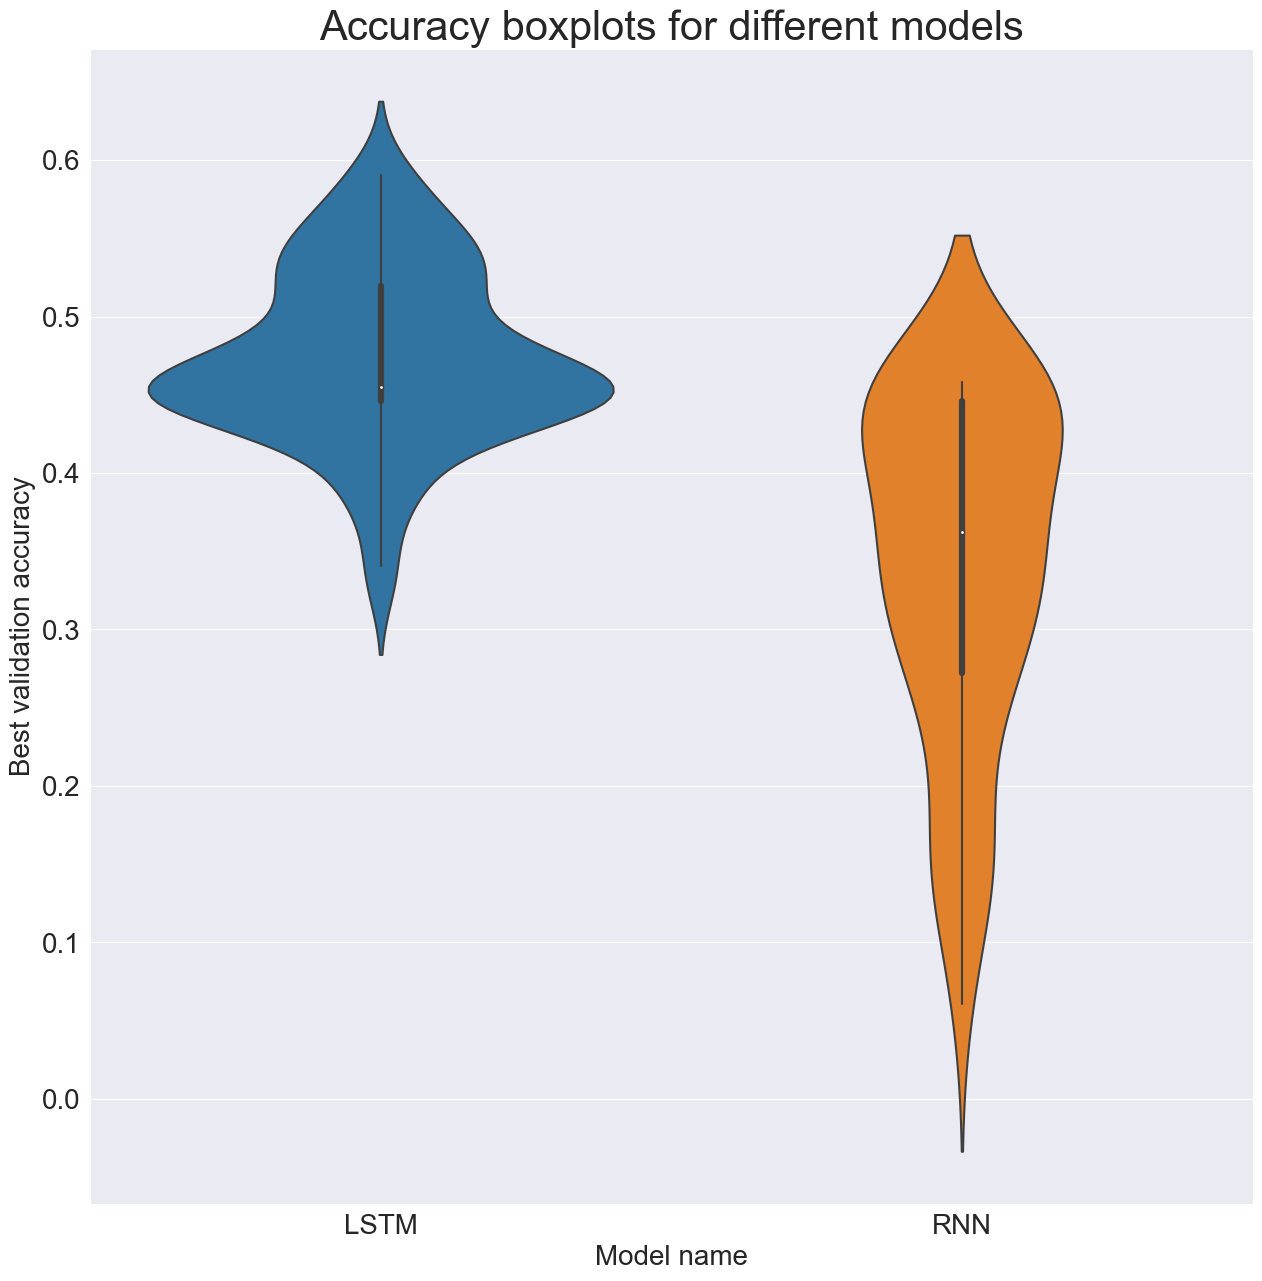

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))
sns.violinplot(x = "model", y="best_accuracy_validation", data= res_df)
plt.title("Accuracy boxplots for different models", fontsize=30)
plt.ylabel("Best validation accuracy", fontsize=20)
plt.xlabel("Model name", fontsize=20)
plt.show()

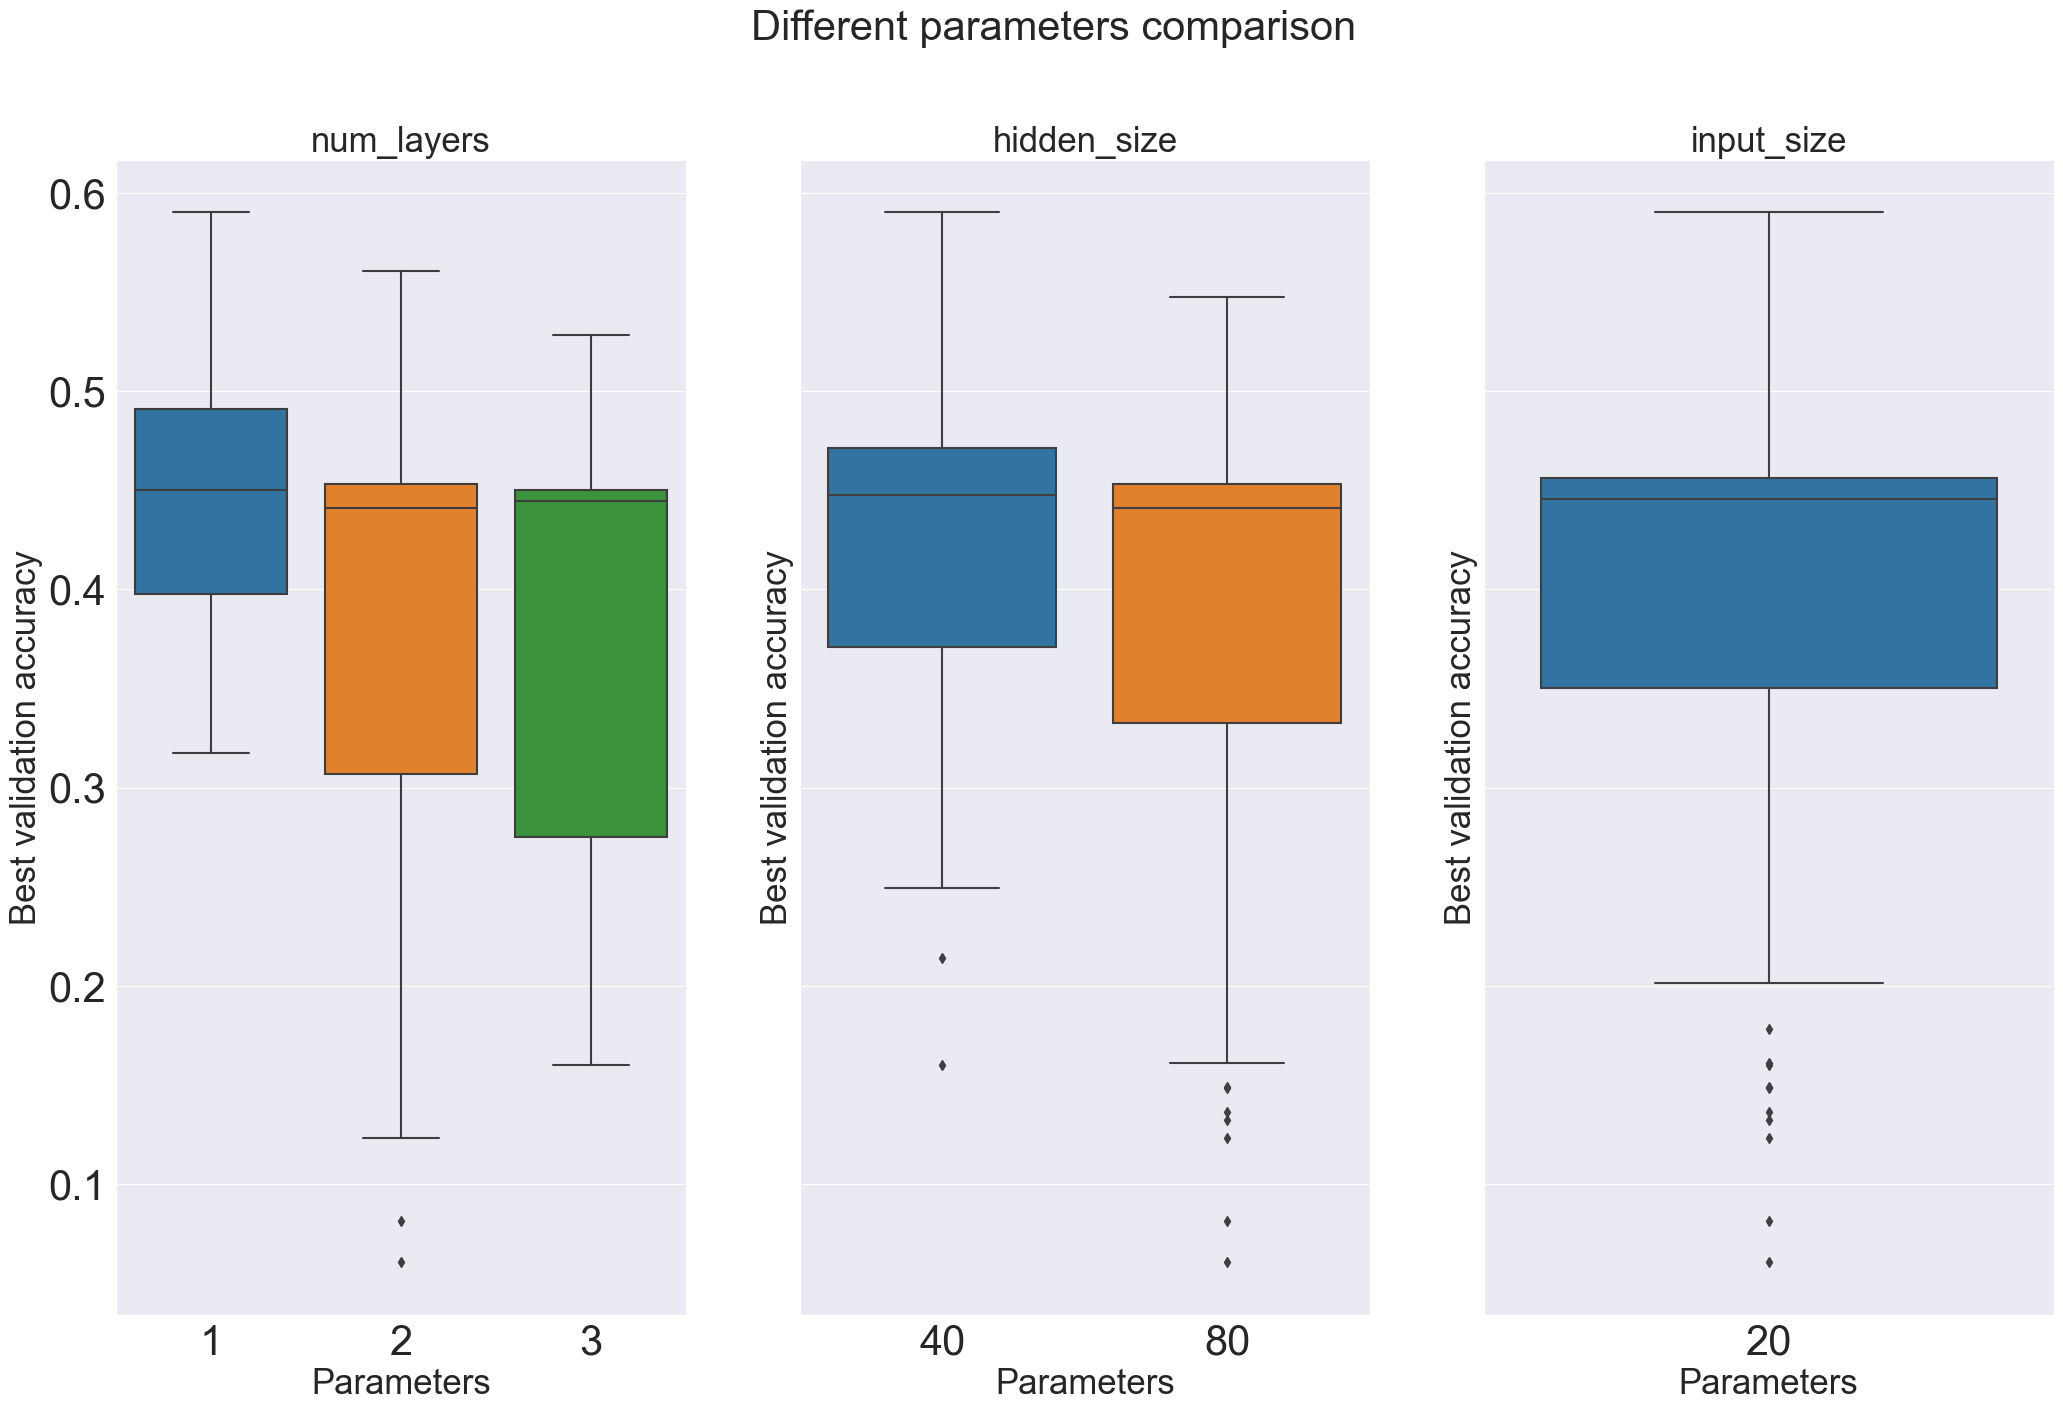

In [32]:
import seaborn as sns
from matplotlib import pyplot as plt
params = ['num_layers', 'hidden_size', 'input_size']
fig, ax = plt.subplots(1,3,figsize=(25,15), sharey='all')
fig.suptitle("Different parameters comparison", fontsize=30)
for i in range(3):
    sns.boxplot(x = "train_params." + params[i], y="best_accuracy_validation", data= res_df, ax=ax[i])
    ax[i].set_title(params[i], fontsize=25)
    ax[i].set_ylabel("Best validation accuracy", fontsize=25)
    ax[i].set_xlabel("Parameters", fontsize=25)
plt.show()

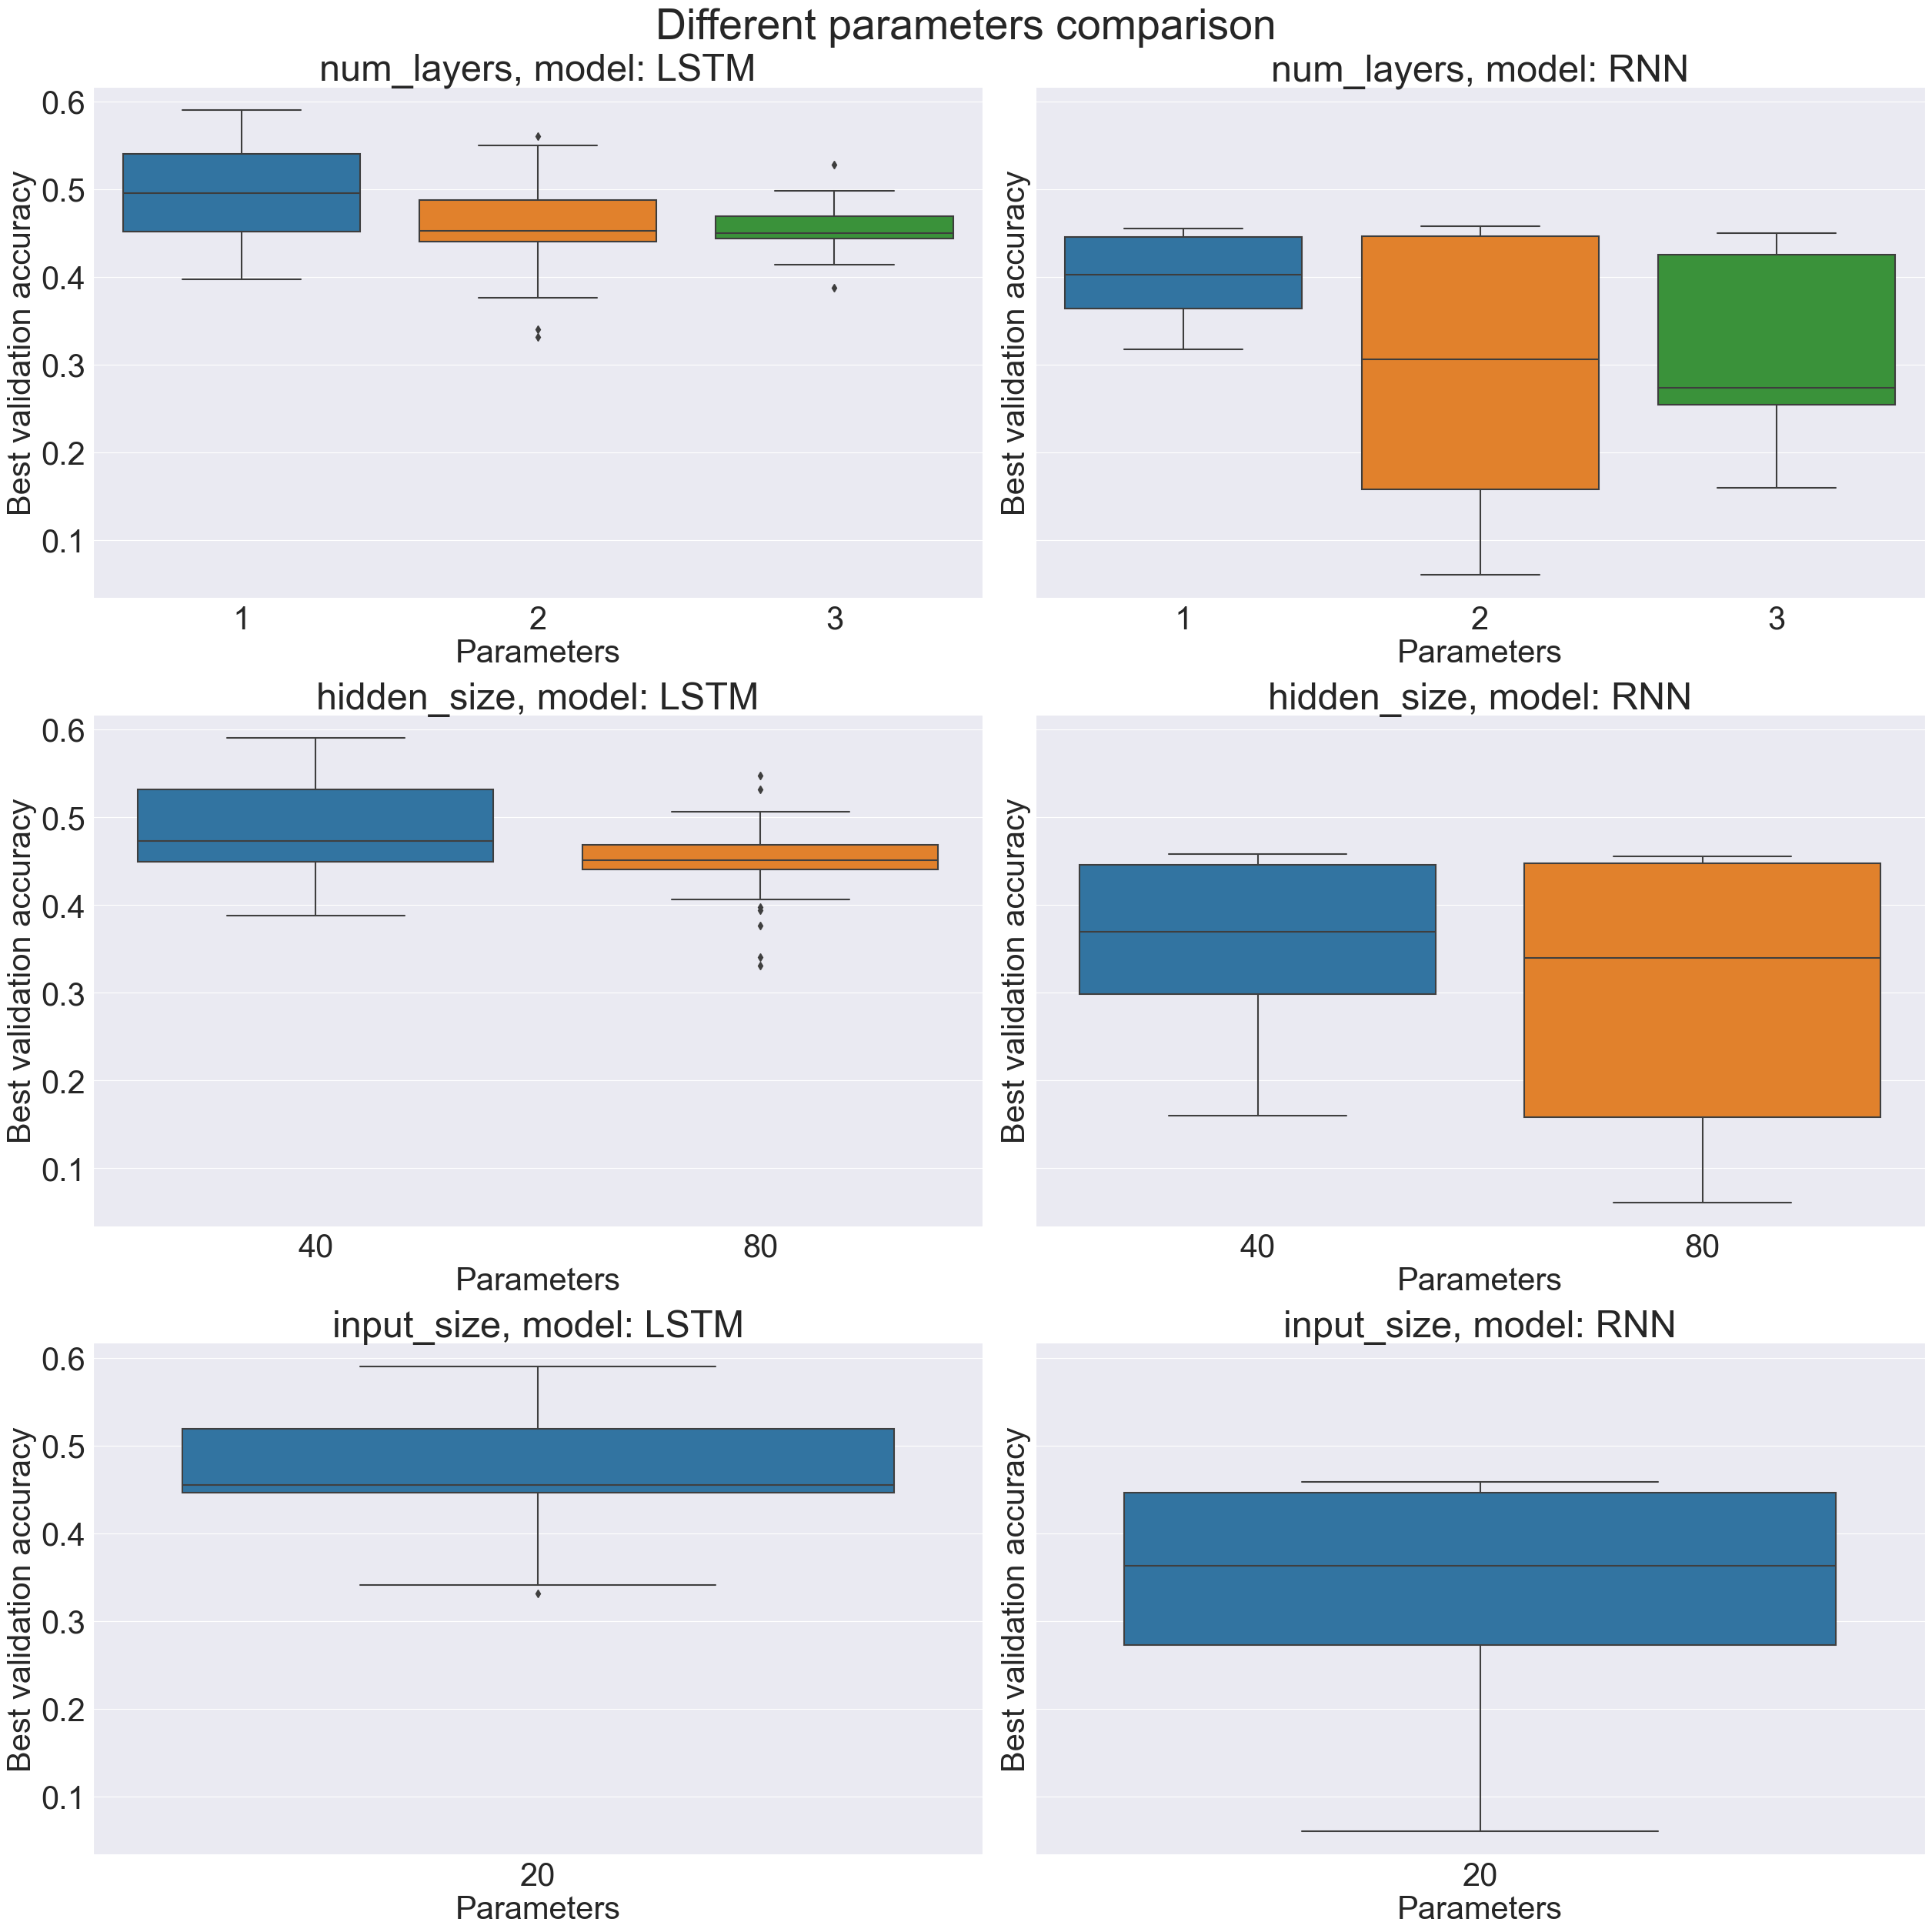

In [33]:
import seaborn as sns
from matplotlib import pyplot as plt
mpl.rcParams['xtick.labelsize'] = 30
mpl.rcParams['ytick.labelsize'] = 30
params = ['num_layers', 'hidden_size', 'input_size']
names = ["LSTM", "RNN"]
fig, ax = plt.subplots(3, 2, figsize=(25,25), sharey='all', layout='constrained')
fig.suptitle("Different parameters comparison", fontsize=40)
for i in range(3):
    for j in range(2):
        sns.boxplot(x = "train_params." + params[i], y="best_accuracy_validation",
                    data= res_df.loc[res_df['model'] == names[j]], ax=ax[i,j])
        ax[i,j].set_title(params[i] + ", model: " + names[j], fontsize=35)
        ax[i,j].set_ylabel("Best validation accuracy", fontsize=30)
        ax[i,j].set_xlabel("Parameters", fontsize=30)
plt.show()

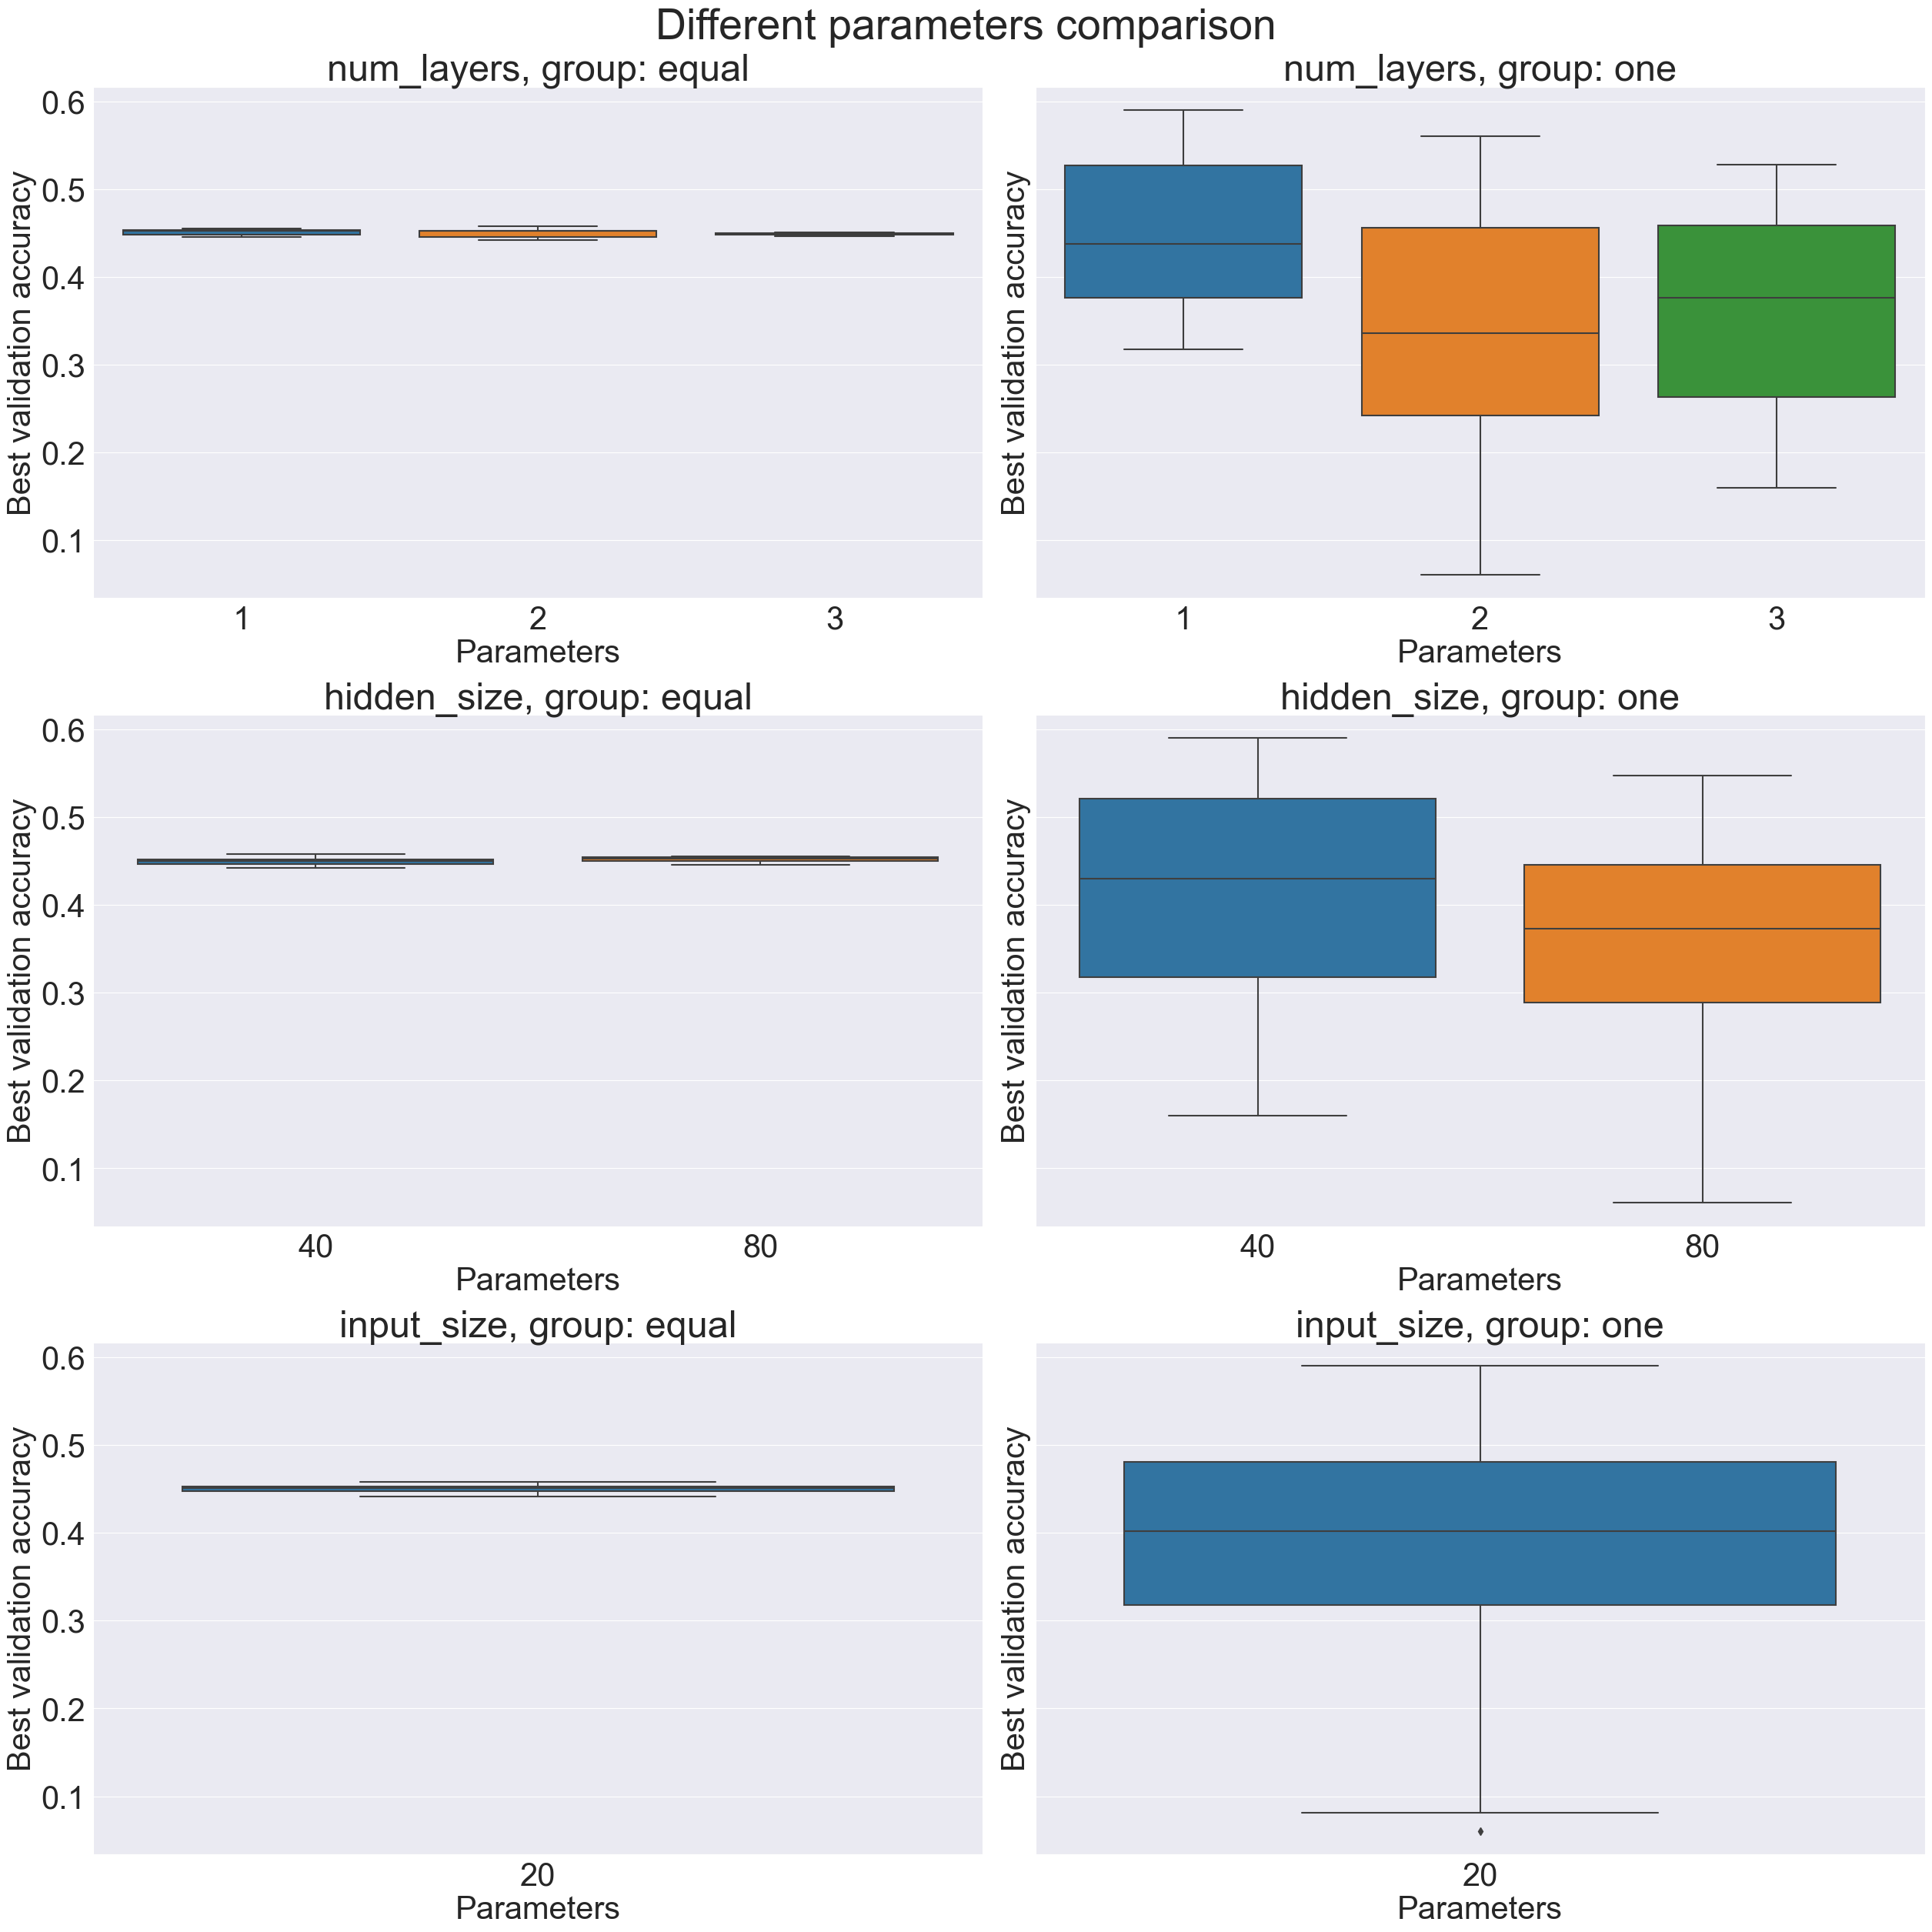

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt
mpl.rcParams['xtick.labelsize'] = 30
mpl.rcParams['ytick.labelsize'] = 30
params = ['num_layers', 'hidden_size', 'input_size']
names = ["equal", "one"]
fig, ax = plt.subplots(3, 2, figsize=(25,25), sharey='all', layout='constrained')
fig.suptitle("Different parameters comparison", fontsize=40)
for i in range(3):
    for j in range(2):
        sns.boxplot(x = "train_params." + params[i], y="best_accuracy_validation",
                    data= res_df.loc[res_df['group'] == names[j]], ax=ax[i,j])
        ax[i,j].set_title(params[i] + ", group: " + names[j], fontsize=35)
        ax[i,j].set_ylabel("Best validation accuracy", fontsize=30)
        ax[i,j].set_xlabel("Parameters", fontsize=30)
plt.show()

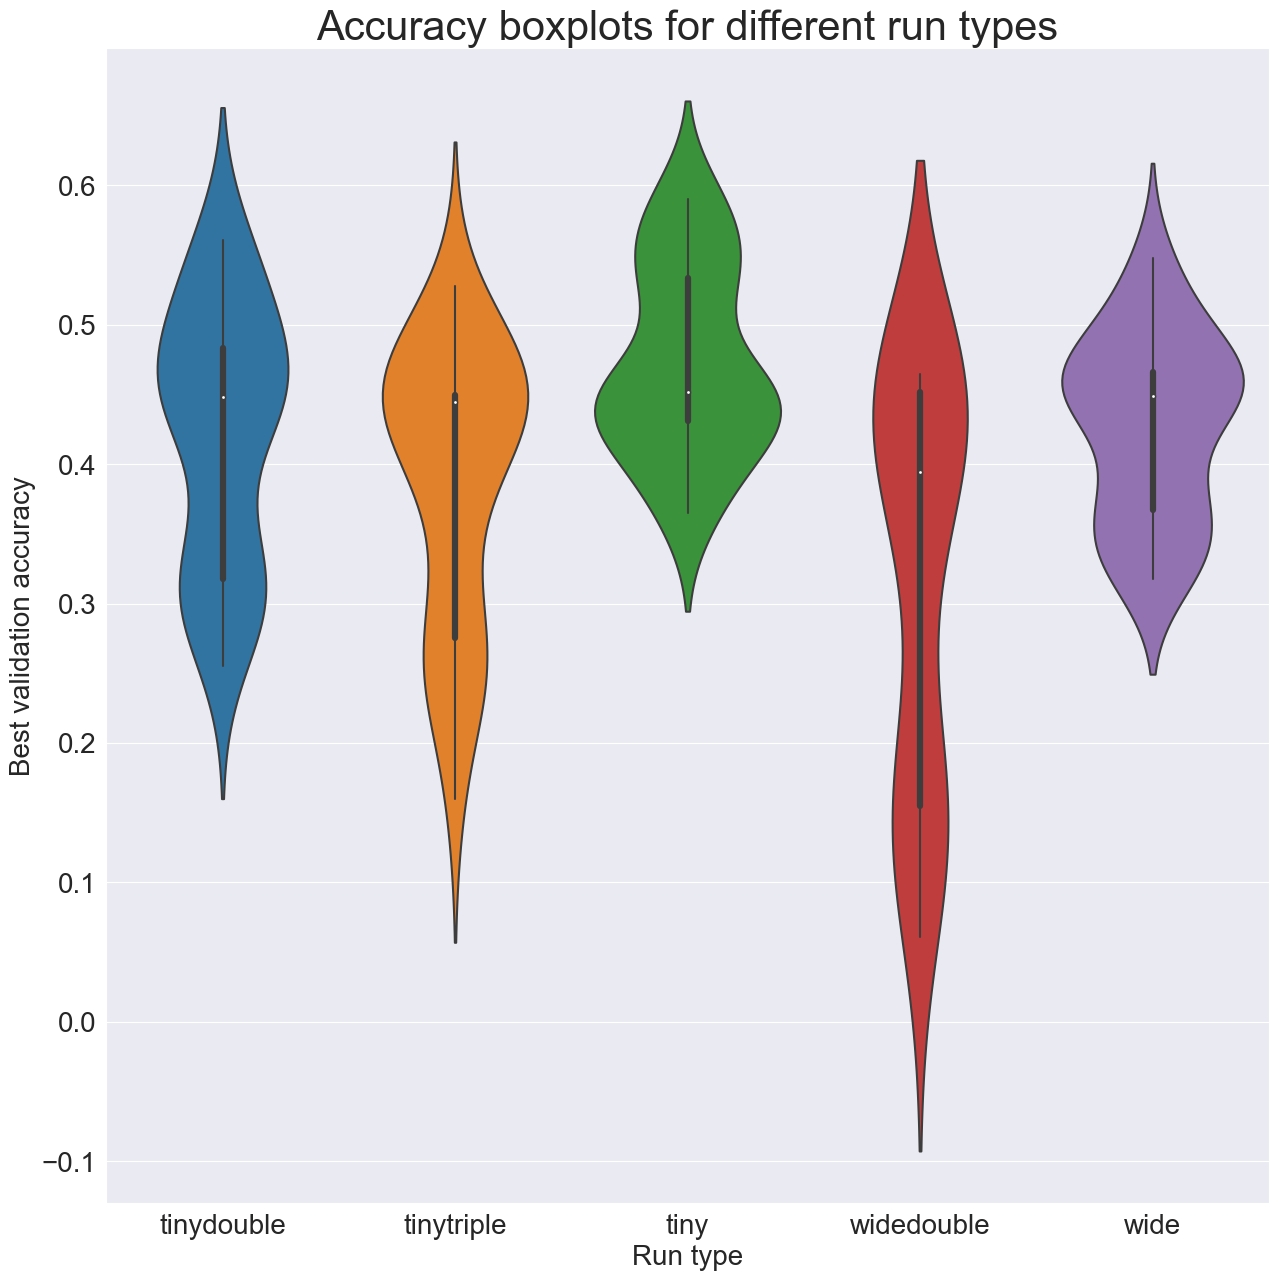

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))
sns.violinplot(x = "run_type", y="best_accuracy_validation", data= res_df)
plt.title("Accuracy boxplots for different run types", fontsize=30)
plt.ylabel("Best validation accuracy", fontsize=20)
plt.xlabel("Run type", fontsize=20)
plt.show()

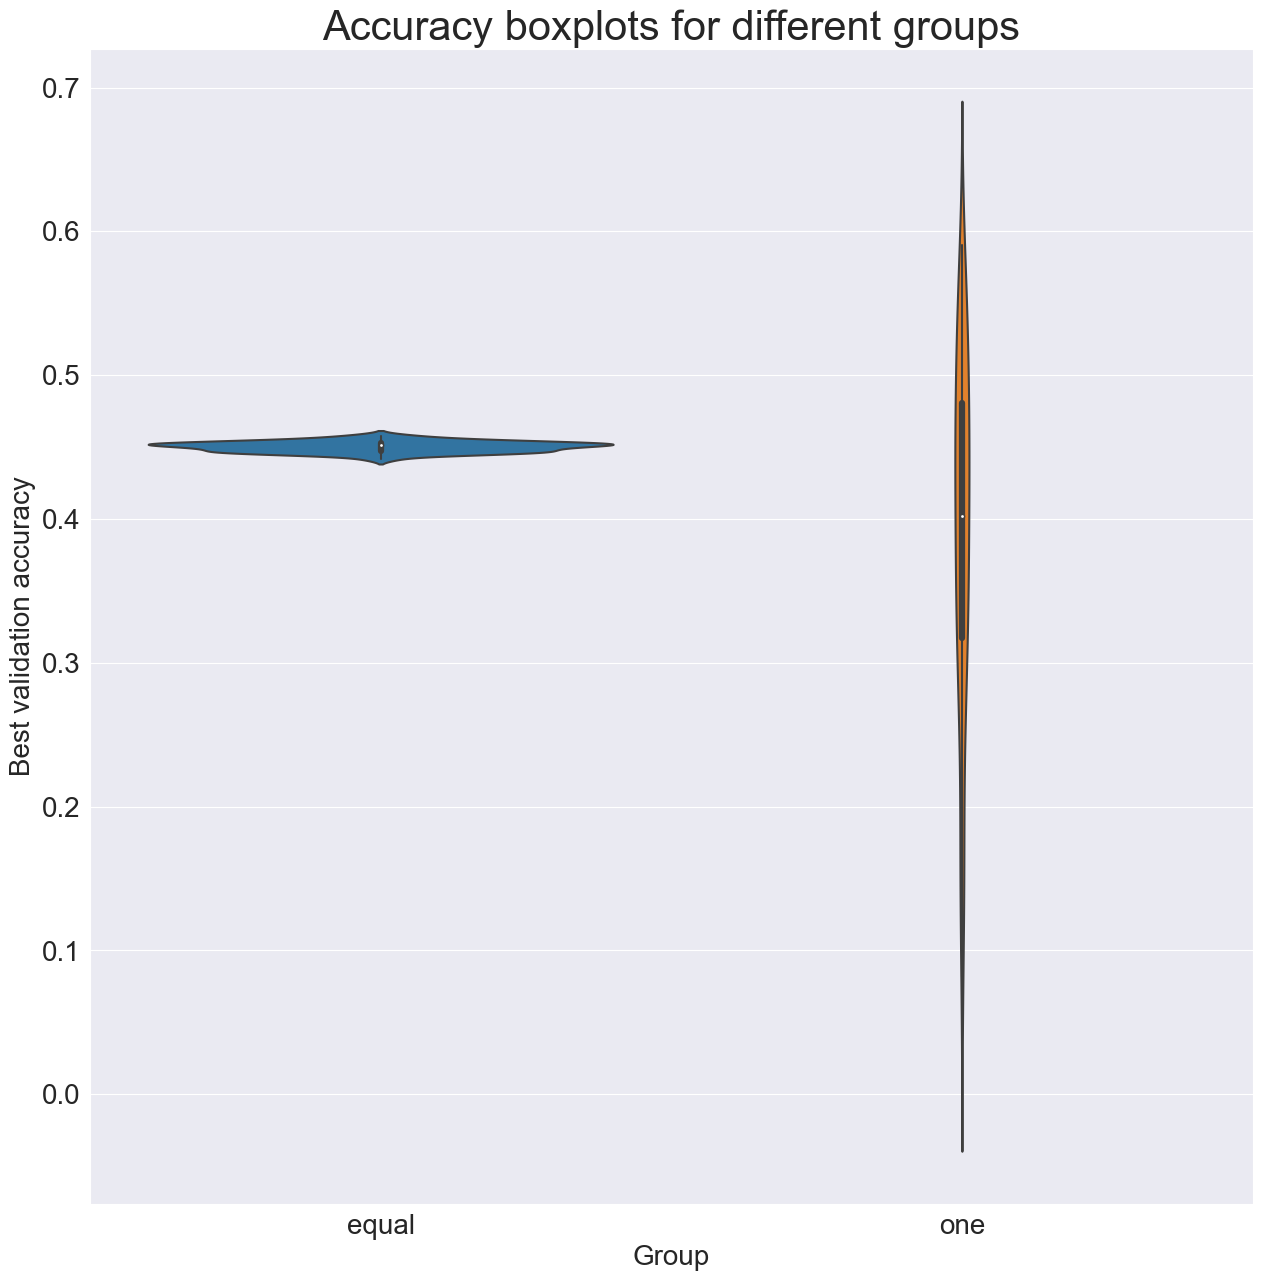

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))
sns.violinplot(x = "group", y="best_accuracy_validation", data= res_df)
plt.title("Accuracy boxplots for different groups", fontsize=30)
plt.ylabel("Best validation accuracy", fontsize=20)
plt.xlabel("Group", fontsize=20)
plt.show()

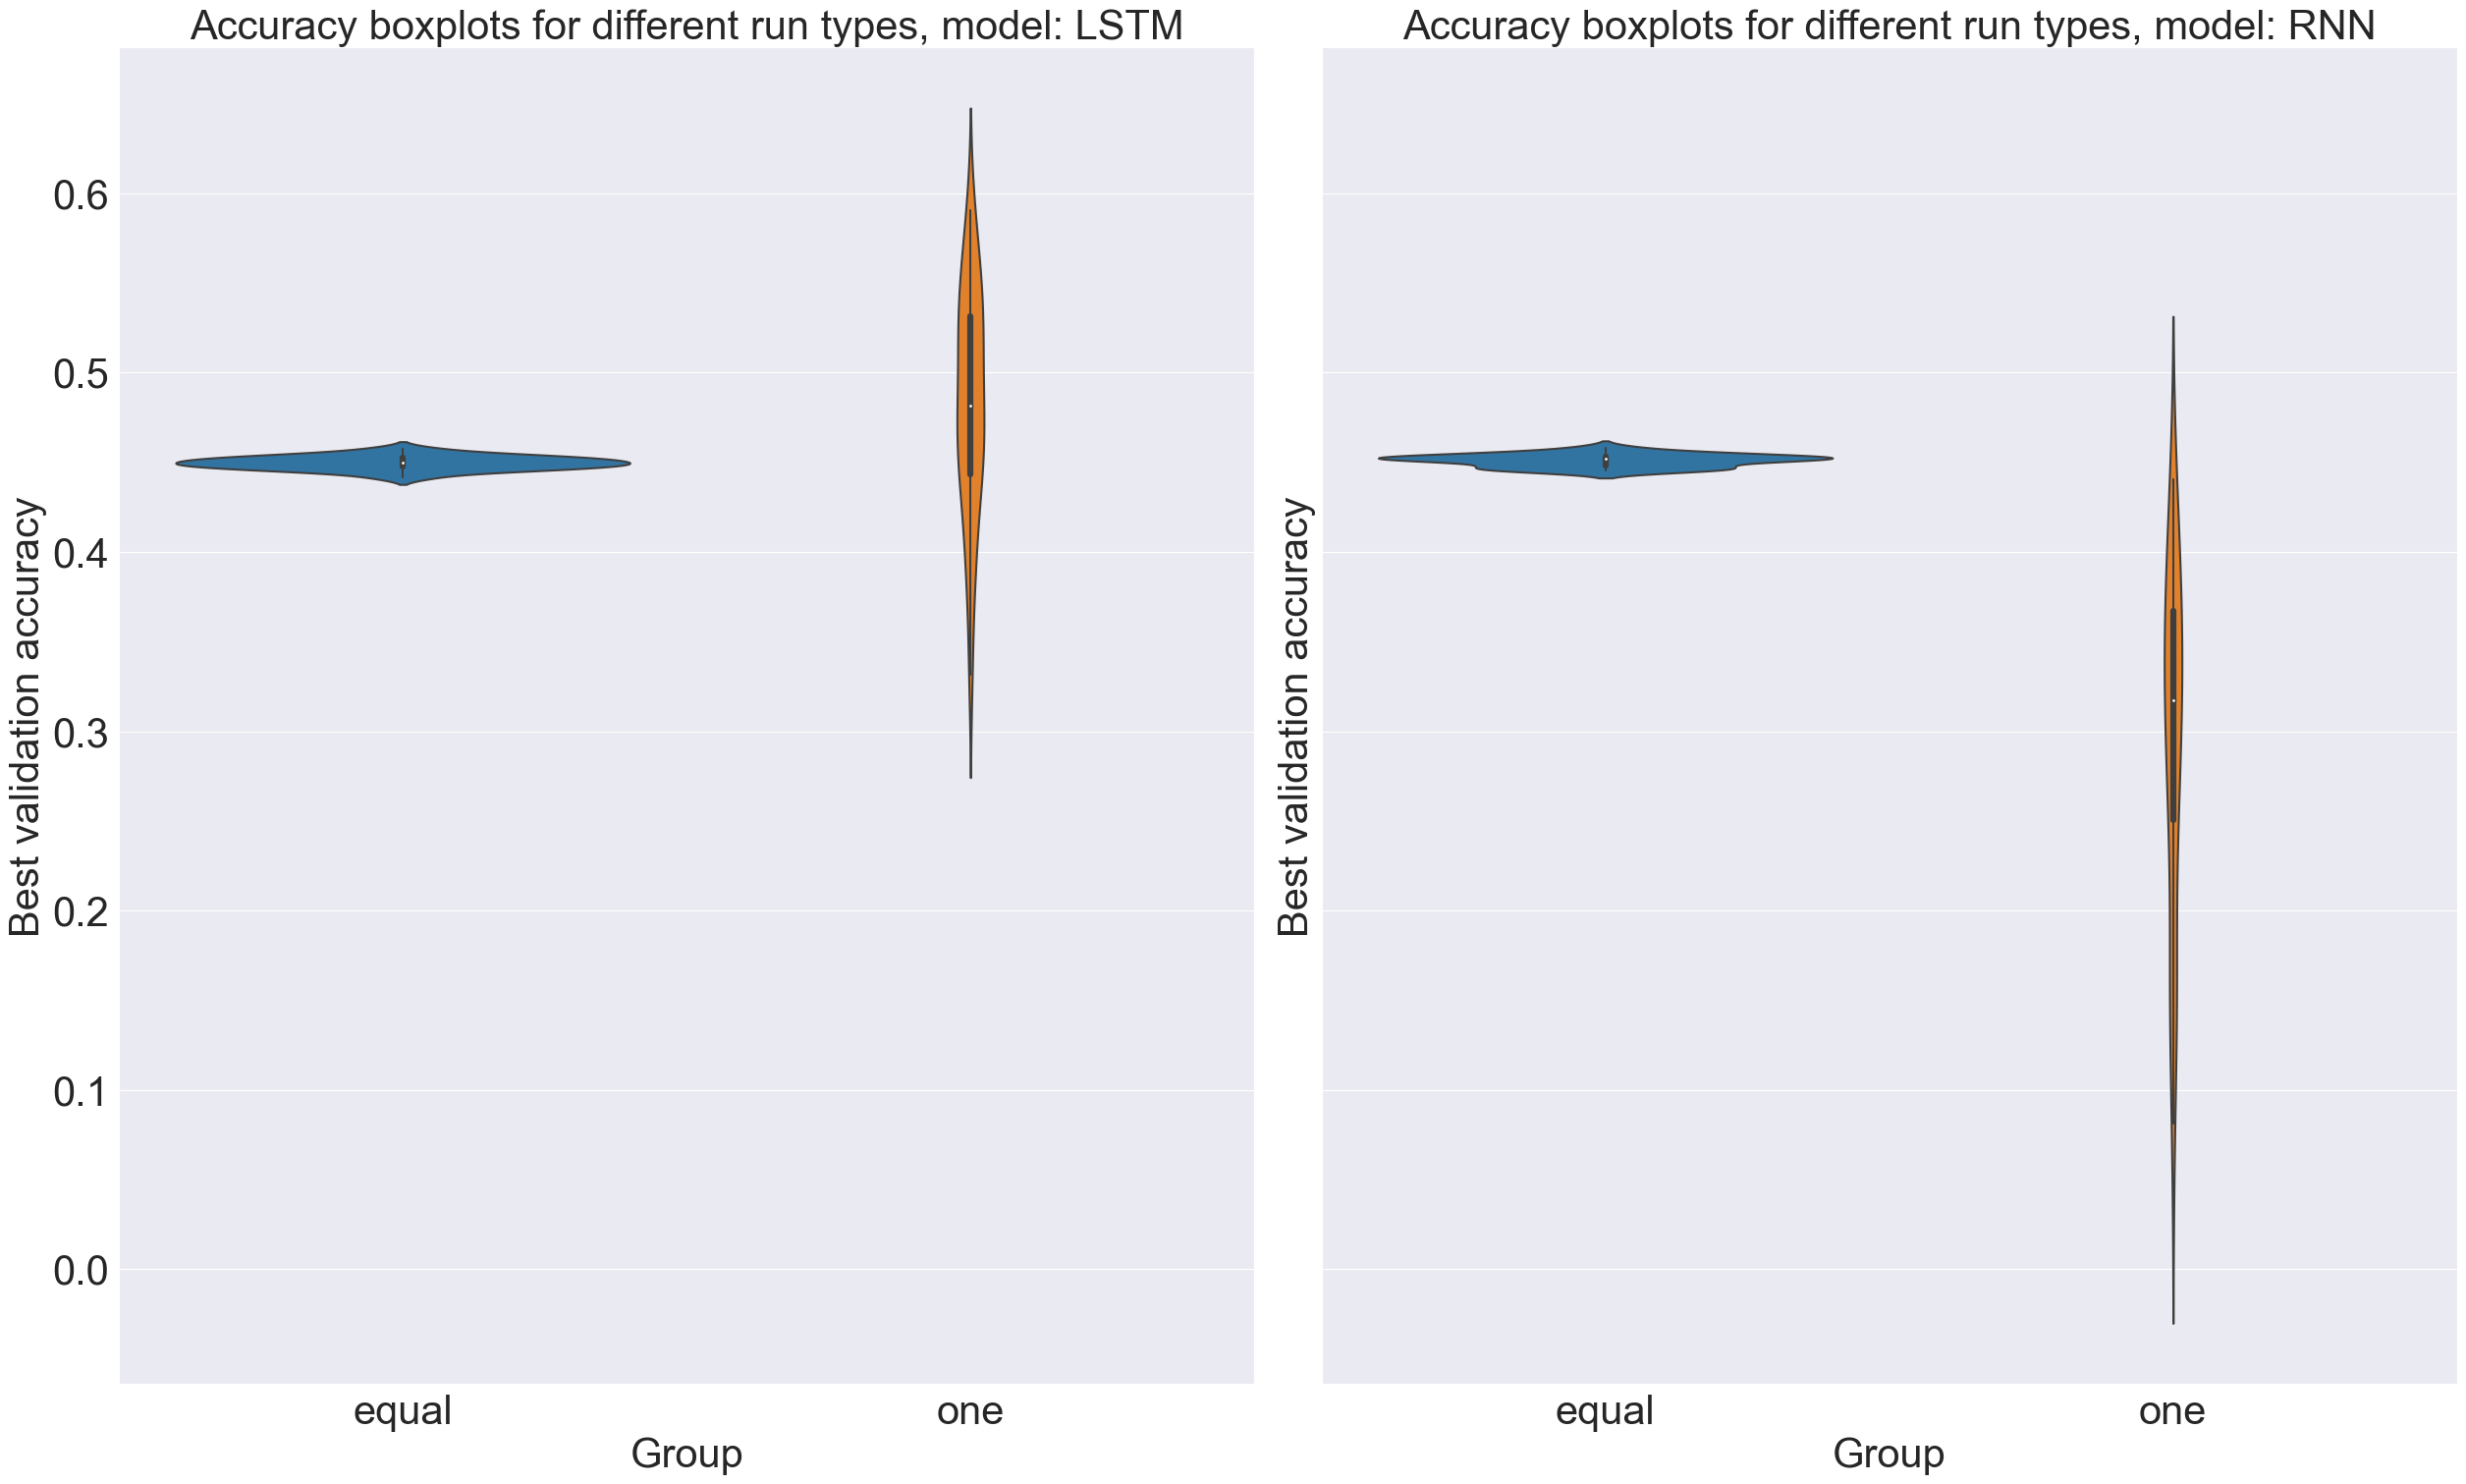

In [31]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(25,15),sharey='all', layout='constrained')
names = ["LSTM", "RNN"]
for i in range(2):
    sns.violinplot(x = "group", y="best_accuracy_validation", data= res_df.loc[res_df['model'] == names[i]], ax=ax[i])
    ax[i].set_title("Accuracy boxplots for different run types" + ", model: " + names[i], fontsize=30)
    ax[i].set_ylabel("Best validation accuracy", fontsize=30)
    ax[i].set_xlabel("Group", fontsize=30)
plt.show()

In [19]:
res_df['max_model'] = res_df.groupby('model')['best_accuracy_validation'].transform('max')
res_df['max_group'] = res_df.groupby('group')['best_accuracy_validation'].transform('max')
res_df['max_model_group'] = res_df.groupby(['model','group'])['best_accuracy_validation'].transform('max')
best_model = res_df[res_df['best_accuracy_validation'].isin(res_df['max_model'])]
best_group = res_df[res_df['best_accuracy_validation'].isin(res_df['max_group'])]
best_model_group = res_df[res_df['best_accuracy_validation'].isin(res_df['max_model_group'])]

In [34]:
def plot_best_trajectories(df, title, legend_title):
    n = len(df)
    validation_values = [[] for i in range(n)]
    for i in range(n):
        for j in range(len(df['trajectory'].iloc[i])):
            validation_values[i].append(df['trajectory'].iloc[i][j]['validation'])
    if "model" in title and not "group" in title:
        names = [df.iloc[i]['model'] for i in range(n)]
    elif "group" in title and not "model" in title:
        names = [df.iloc[i]['group'] for i in range(n)]
    elif "group" in title and "model" in title:
        names = [df.iloc[i]['name'] + '_' + df.iloc[i]['group'] for i in range(n)]
    else:
        names = [df.iloc[i]['name'] for i in range(n)]
    cols = ['red', 'blue', 'green', 'grey', 'yellow', 'brown', 'purple', 'black']
    cols = cols[:n+1]
    fig, ax = plt.subplots(figsize=(15,13))
    for i in range(n):
        ax.plot([i for i in range(len(validation_values[i]))], validation_values[i], color=cols[i], linewidth=4, label=names[i])
    plt.legend(title=legend_title, fontsize=20, title_fontsize=20, loc='lower right')
    plt.title(title, fontsize=30)
    plt.xlabel("Epochs", fontsize=20)
    plt.ylabel("Accuracy", fontsize=20)
    plt.show()

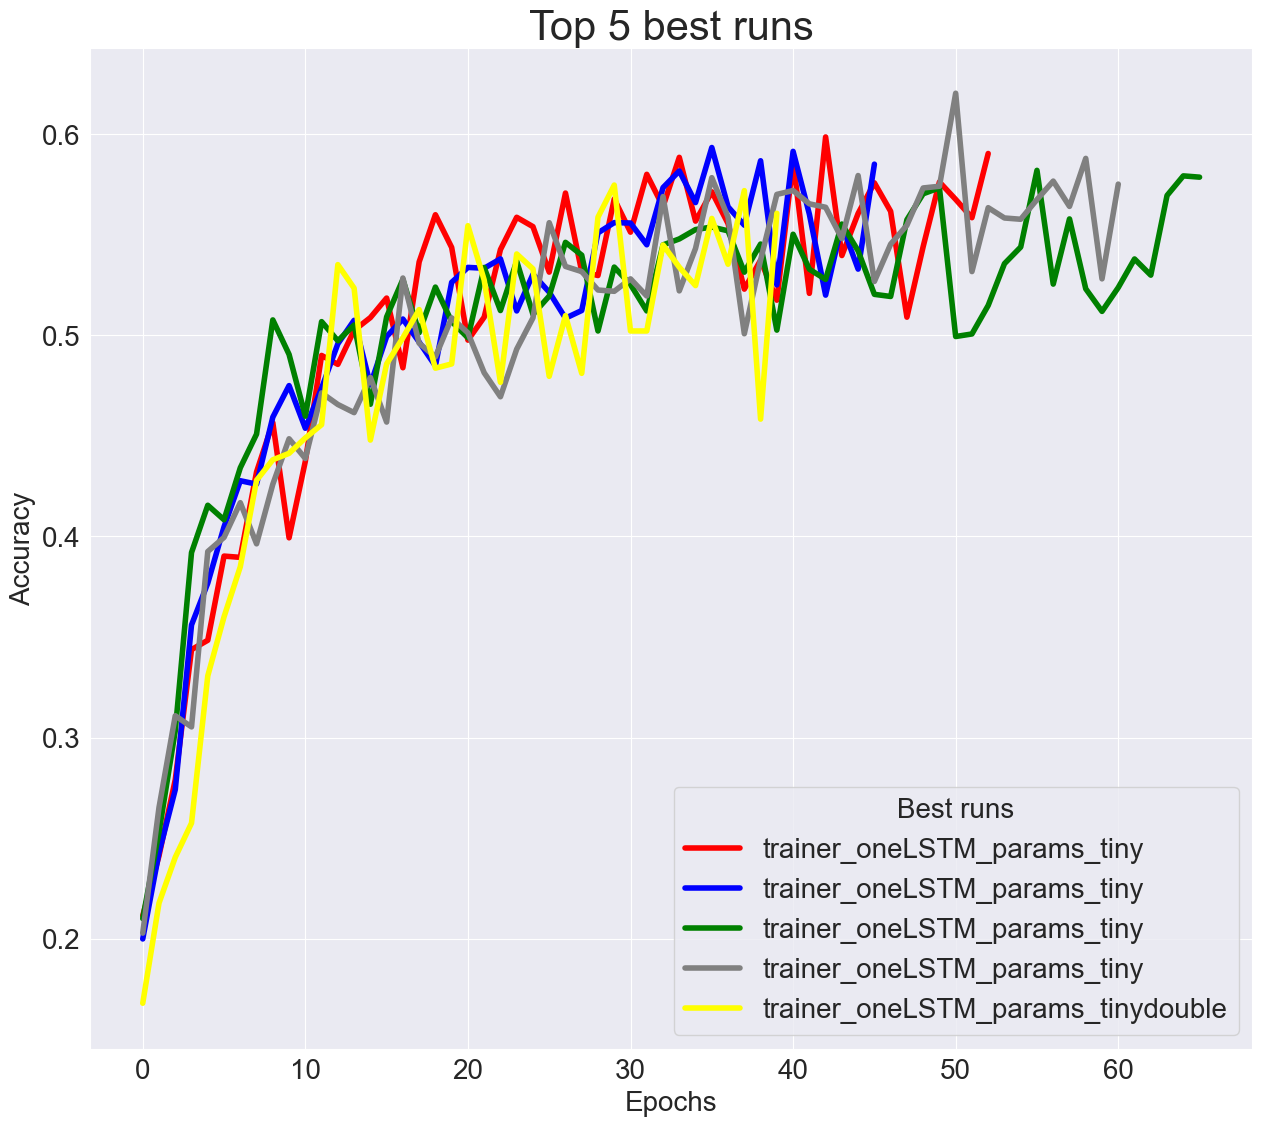

In [20]:
plot_best_trajectories(top5_models, "Top 5 best runs", "Best runs")

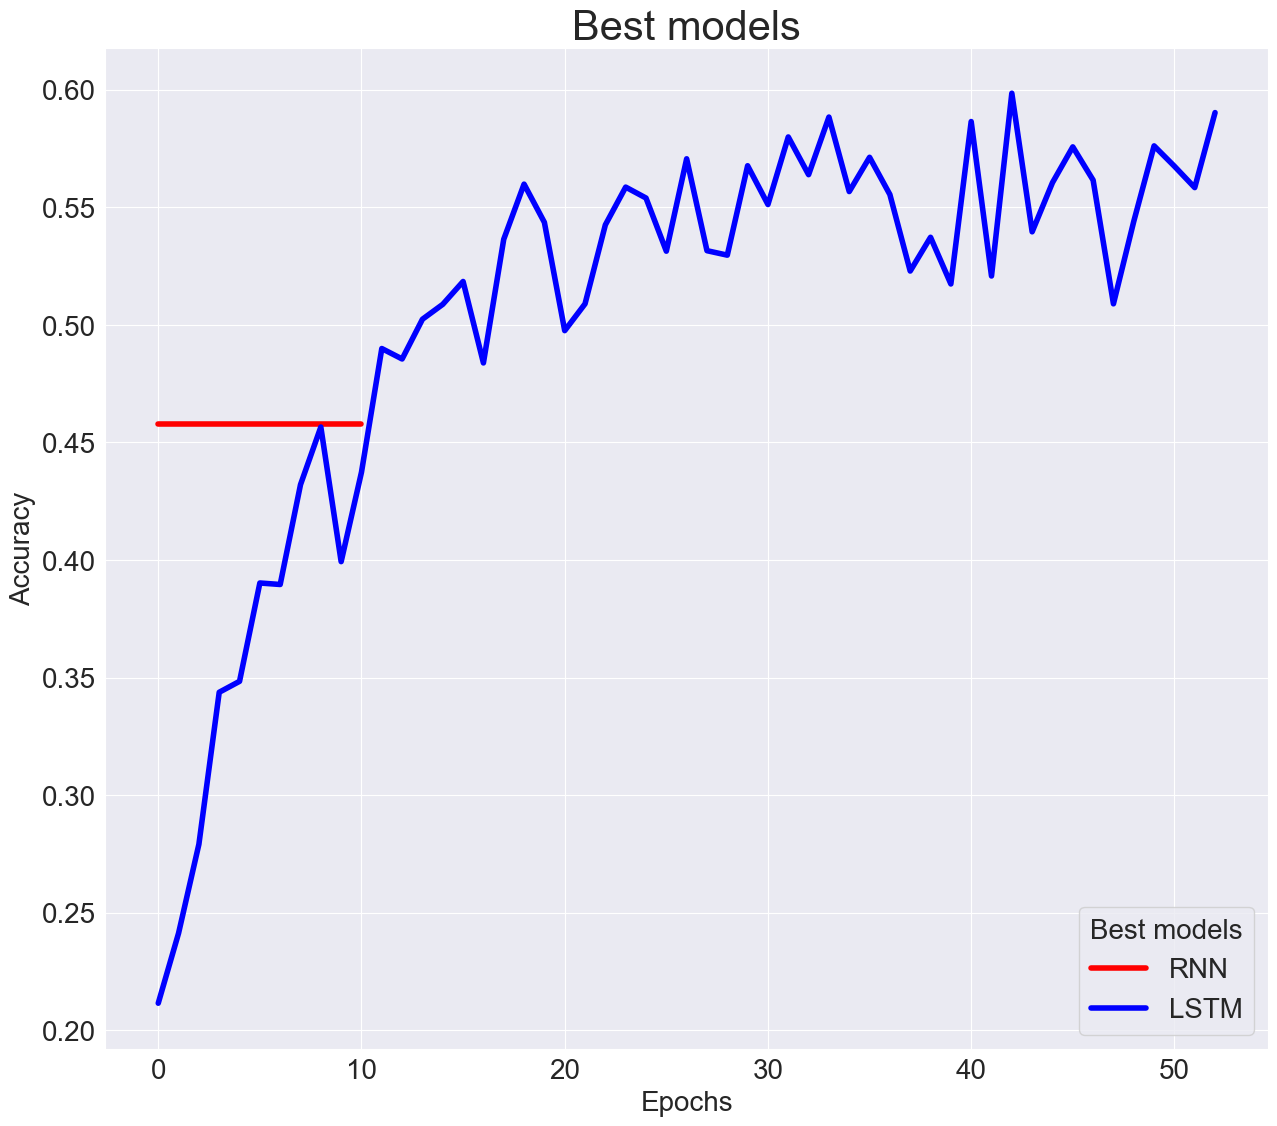

In [21]:
plot_best_trajectories(best_model, "Best models", "Best models")

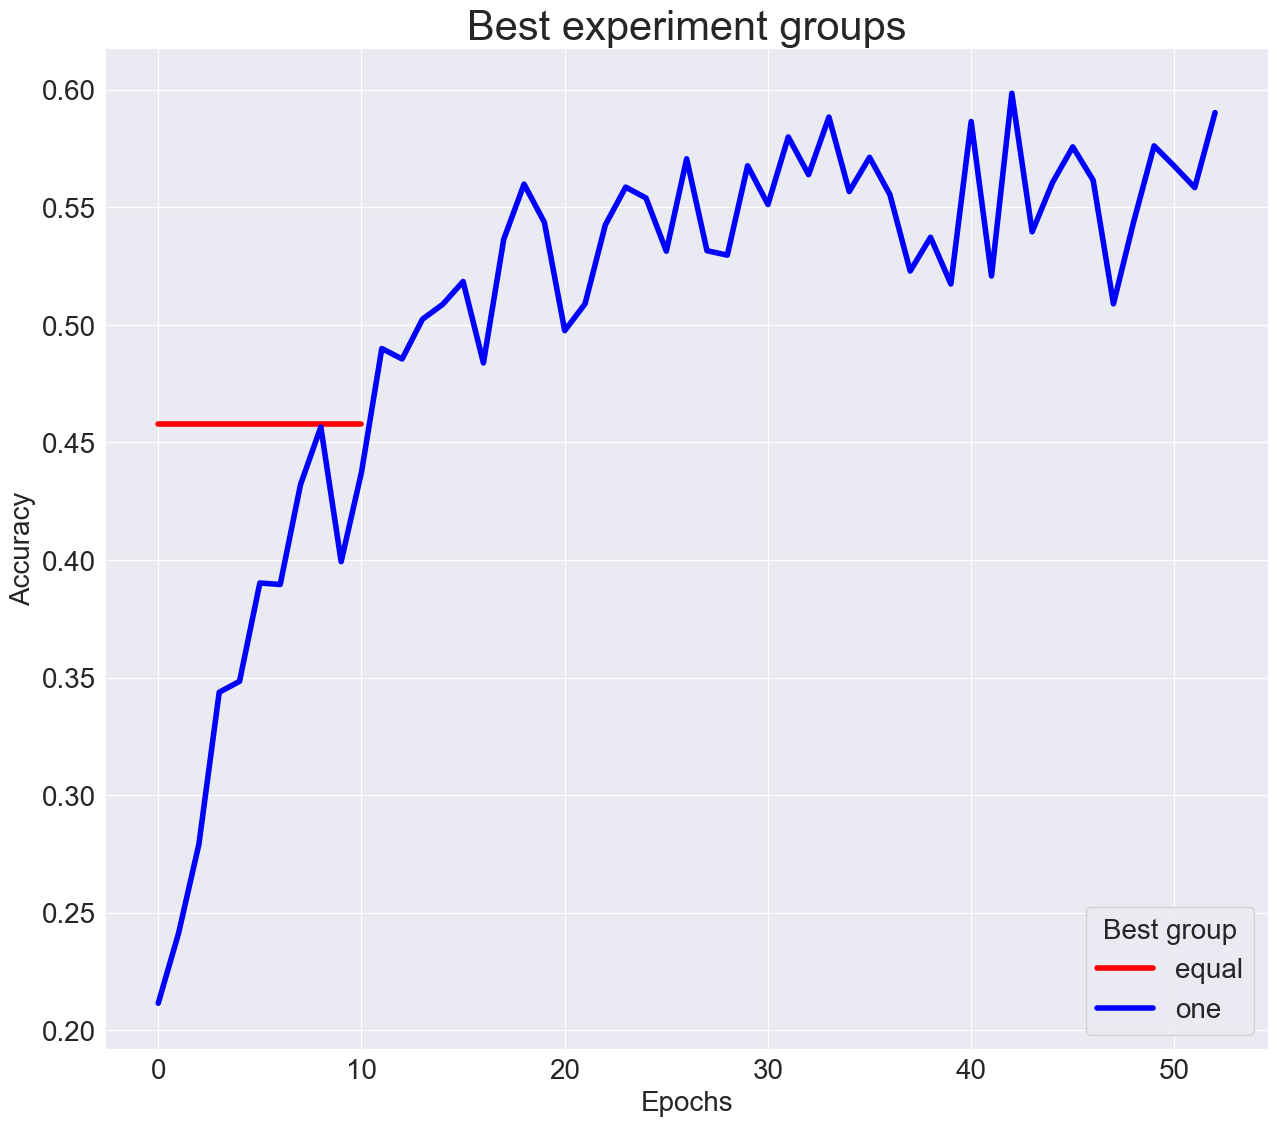

In [22]:
plot_best_trajectories(best_group, "Best experiment groups", "Best group")

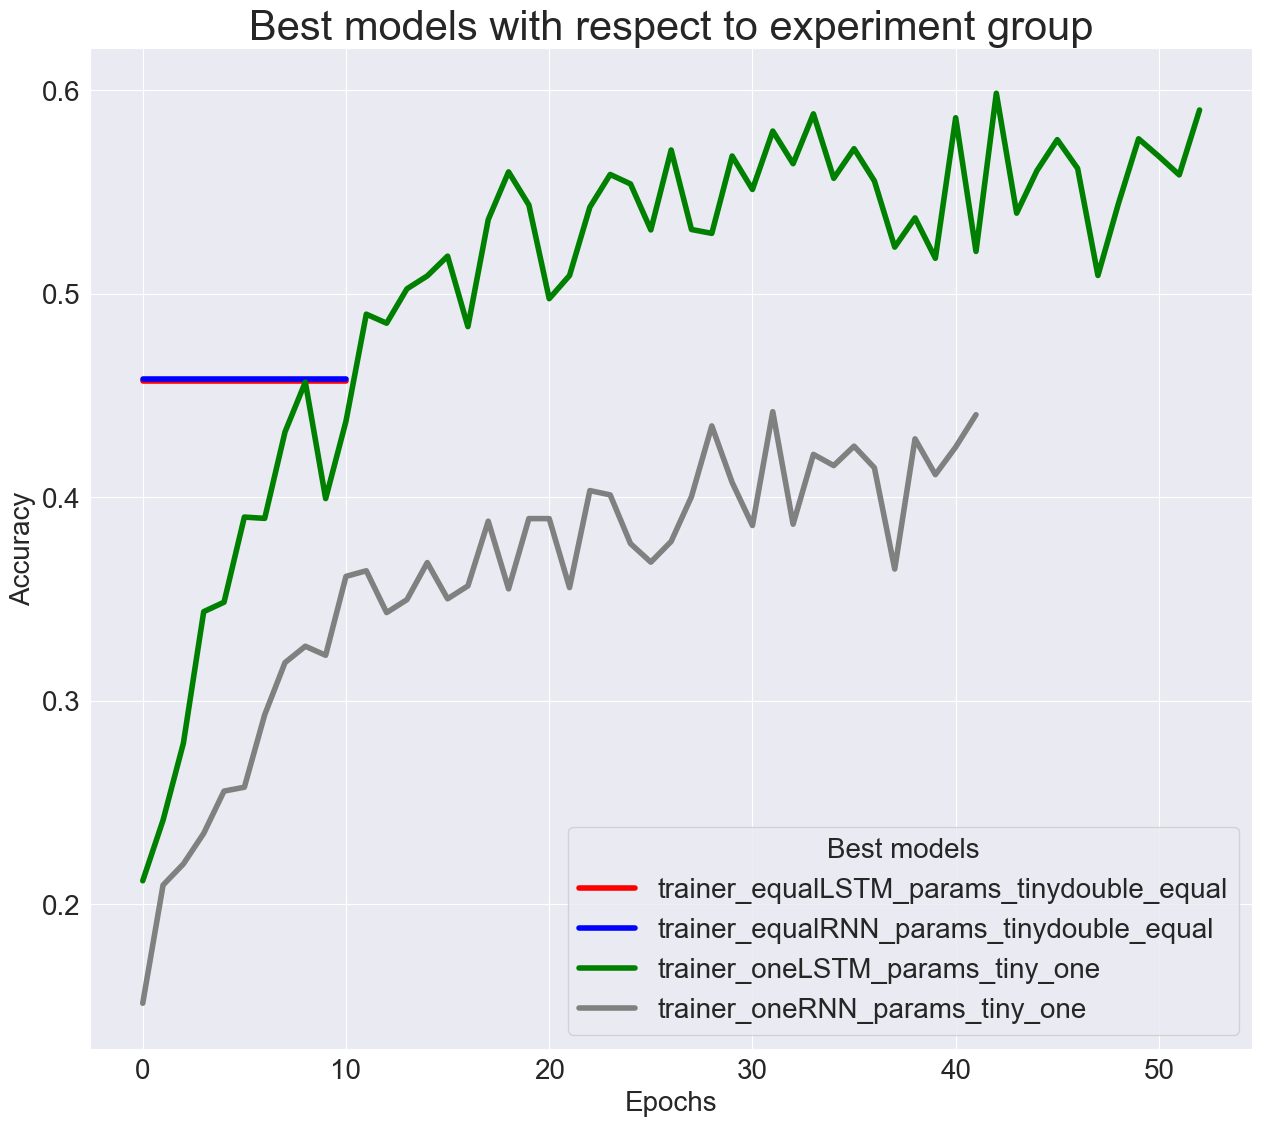

In [25]:
plot_best_trajectories(best_model_group, "Best models with respect to experiment group", "Best models")

# Further experiments

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import librosa
import glob
from data_loading_preparation import DataPrep
import matplotlib
import matplotlib as mpl
from operator import itemgetter
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20

In [3]:
import os
import json

path="experiments_rnn"
results = []
for el in os.listdir(path):
    if el.endswith("json"):
        with open(path+"/"+el) as f:
            report = json.load(f)
            report["filename"] = el
            if 'LSTM' in el:
                report['model'] = "LSTM"
            else:
                report['model'] = "RNN"
            if 'one' in report['name']:
                report['group'] = 'one'
            elif 'equal' in report['name']:
                report['group'] = 'equal'
            elif 'differentiator' in report['name']:
                report['group'] = 'differentiator'
            else:
                report['group'] = 'detector'
            if 'LSTM' in el:
                report['aug'] = str.split(str.split(report['name'], "_")[1], "LSTM")[0]
            else:
                report['aug'] = "noaug"
            report['run_type'] = str.split(report['name'], "_")[-1]
            results.append(report)


import pandas as pd
res_df = pd.json_normalize(results, sep='.')
res_df["epochs"] = res_df["trajectory"].apply(len)
res_df

,name,run,best_accuracy_validation,time_generated,trajectory,filename,model,group,aug,run_type,train_params.hidden_size,train_params.input_size,train_params.num_layers,train_params.classifier_size,epochs
0,trainer_equalLSTM_params_tinydouble,1,0.445281,2023-04-15T13:41:00.038244,"[{'epoch': 1, 'validation': 0.4452805848204687...",trainer_equalLSTM_params_tinydouble_run_1_repo...,LSTM,equal,equal,tinydouble,40,20,2,NaN,11
1,trainer_equalLSTM_params_tinydouble,2,0.441800,2023-04-15T14:10:08.522334,"[{'epoch': 1, 'validation': 0.4418000865426222...",trainer_equalLSTM_params_tinydouble_run_2_repo...,LSTM,equal,equal,tinydouble,40,20,2,NaN,11
2,trainer_equalLSTM_params_tinydouble,3,0.457299,2023-04-15T14:52:53.800735,"[{'epoch': 1, 'validation': 0.4572991165334455...",trainer_equalLSTM_params_tinydouble_run_3_repo...,LSTM,equal,equal,tinydouble,40,20,2,NaN,11
3,trainer_equalLSTM_params_tinydouble,4,0.445757,2023-04-15T16:00:37.789679,"[{'epoch': 1, 'validation': 0.4457572502685284...",trainer_equalLSTM_params_tinydouble_run_4_repo...,LSTM,equal,equal,tinydouble,40,20,2,NaN,11
4,trainer_equalLSTM_params_tinytriple,1,0.450596,2023-04-15T13:42:23.679055,"[{'epoch': 1, 'validation': 0.4505962521294719...",trainer_equalLSTM_params_tinytriple_run_1_repo...,LSTM,equal,equal,tinytriple,40,20,3,NaN,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,trainer_timeshiftLSTMdifferentiator_params_sma...,2,0.737209,2023-04-21T10:23:27.504322,"[{'epoch': 1, 'validation': 0.3290697674418604...",trainer_timeshiftLSTMdifferentiator_params_sma...,LSTM,differentiator,timeshift,smallsingle,64,20,1,NaN,162
427,trainer_timeshiftLSTMdifferentiator_params_sma...,3,0.739147,2023-04-21T13:45:25.293955,"[{'epoch': 1, 'validation': 0.3352713178294573...",trainer_timeshiftLSTMdifferentiator_params_sma...,LSTM,differentiator,timeshift,smallsingle,64,20,1,NaN,60
428,trainer_timeshiftLSTMdifferentiator_params_sma...,4,0.734884,2023-04-21T16:59:51.968424,"[{'epoch': 1, 'validation': 0.3081395348837209...",trainer_timeshiftLSTMdifferentiator_params_sma...,LSTM,differentiator,timeshift,smallsingle,64,20,1,NaN,68
429,trainer_timeshiftLSTMdifferentiator_params_sma...,5,0.737209,2023-04-21T21:36:55.109591,"[{'epoch': 1, 'validation': 0.3368217054263566...",trainer_timeshiftLSTMdifferentiator_params_sma...,LSTM,differentiator,timeshift,smallsingle,64,20,1,NaN,93


In [5]:
res_df['aug'] = res_df['aug'].replace({'equal':'noaug',
                       'one':'noaug'})


In [7]:
res_df['train_params.classifier_size'] = res_df['train_params.classifier_size'].fillna(512)

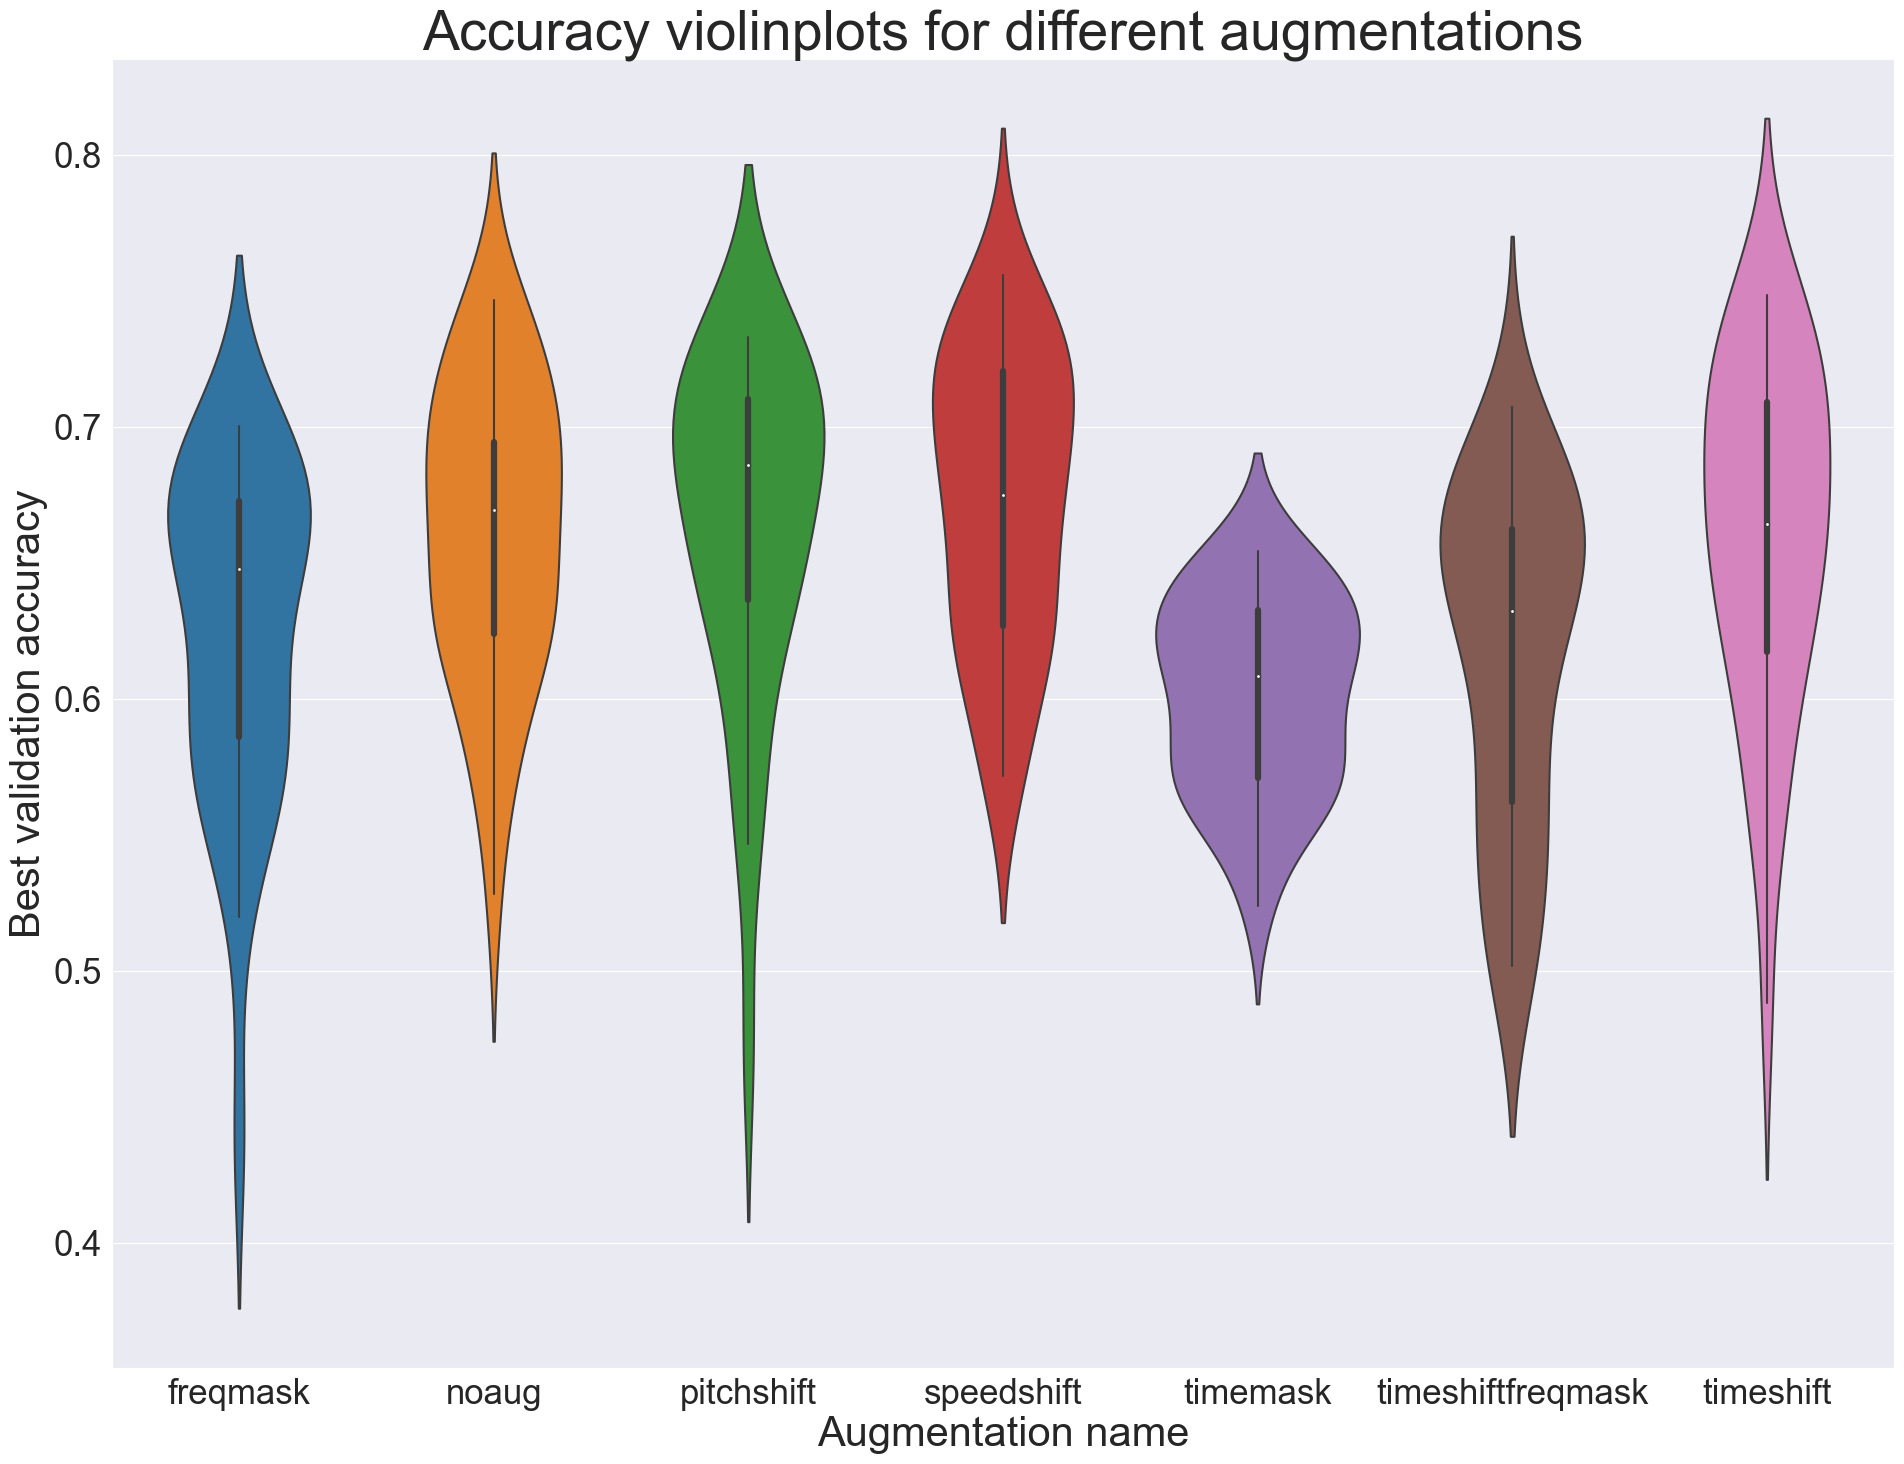

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt
mpl.rcParams['xtick.labelsize'] = 25
mpl.rcParams['ytick.labelsize'] = 25
plt.figure(figsize=(23,17))
sns.violinplot(x = "aug", y="best_accuracy_validation", data=
res_df[(res_df['model'] == 'LSTM') & (res_df['group'] == 'differentiator')])
plt.title("Accuracy violinplots for different augmentations", fontsize=40)
plt.ylabel("Best validation accuracy", fontsize=30)
plt.xlabel("Augmentation name", fontsize=30)
plt.show()

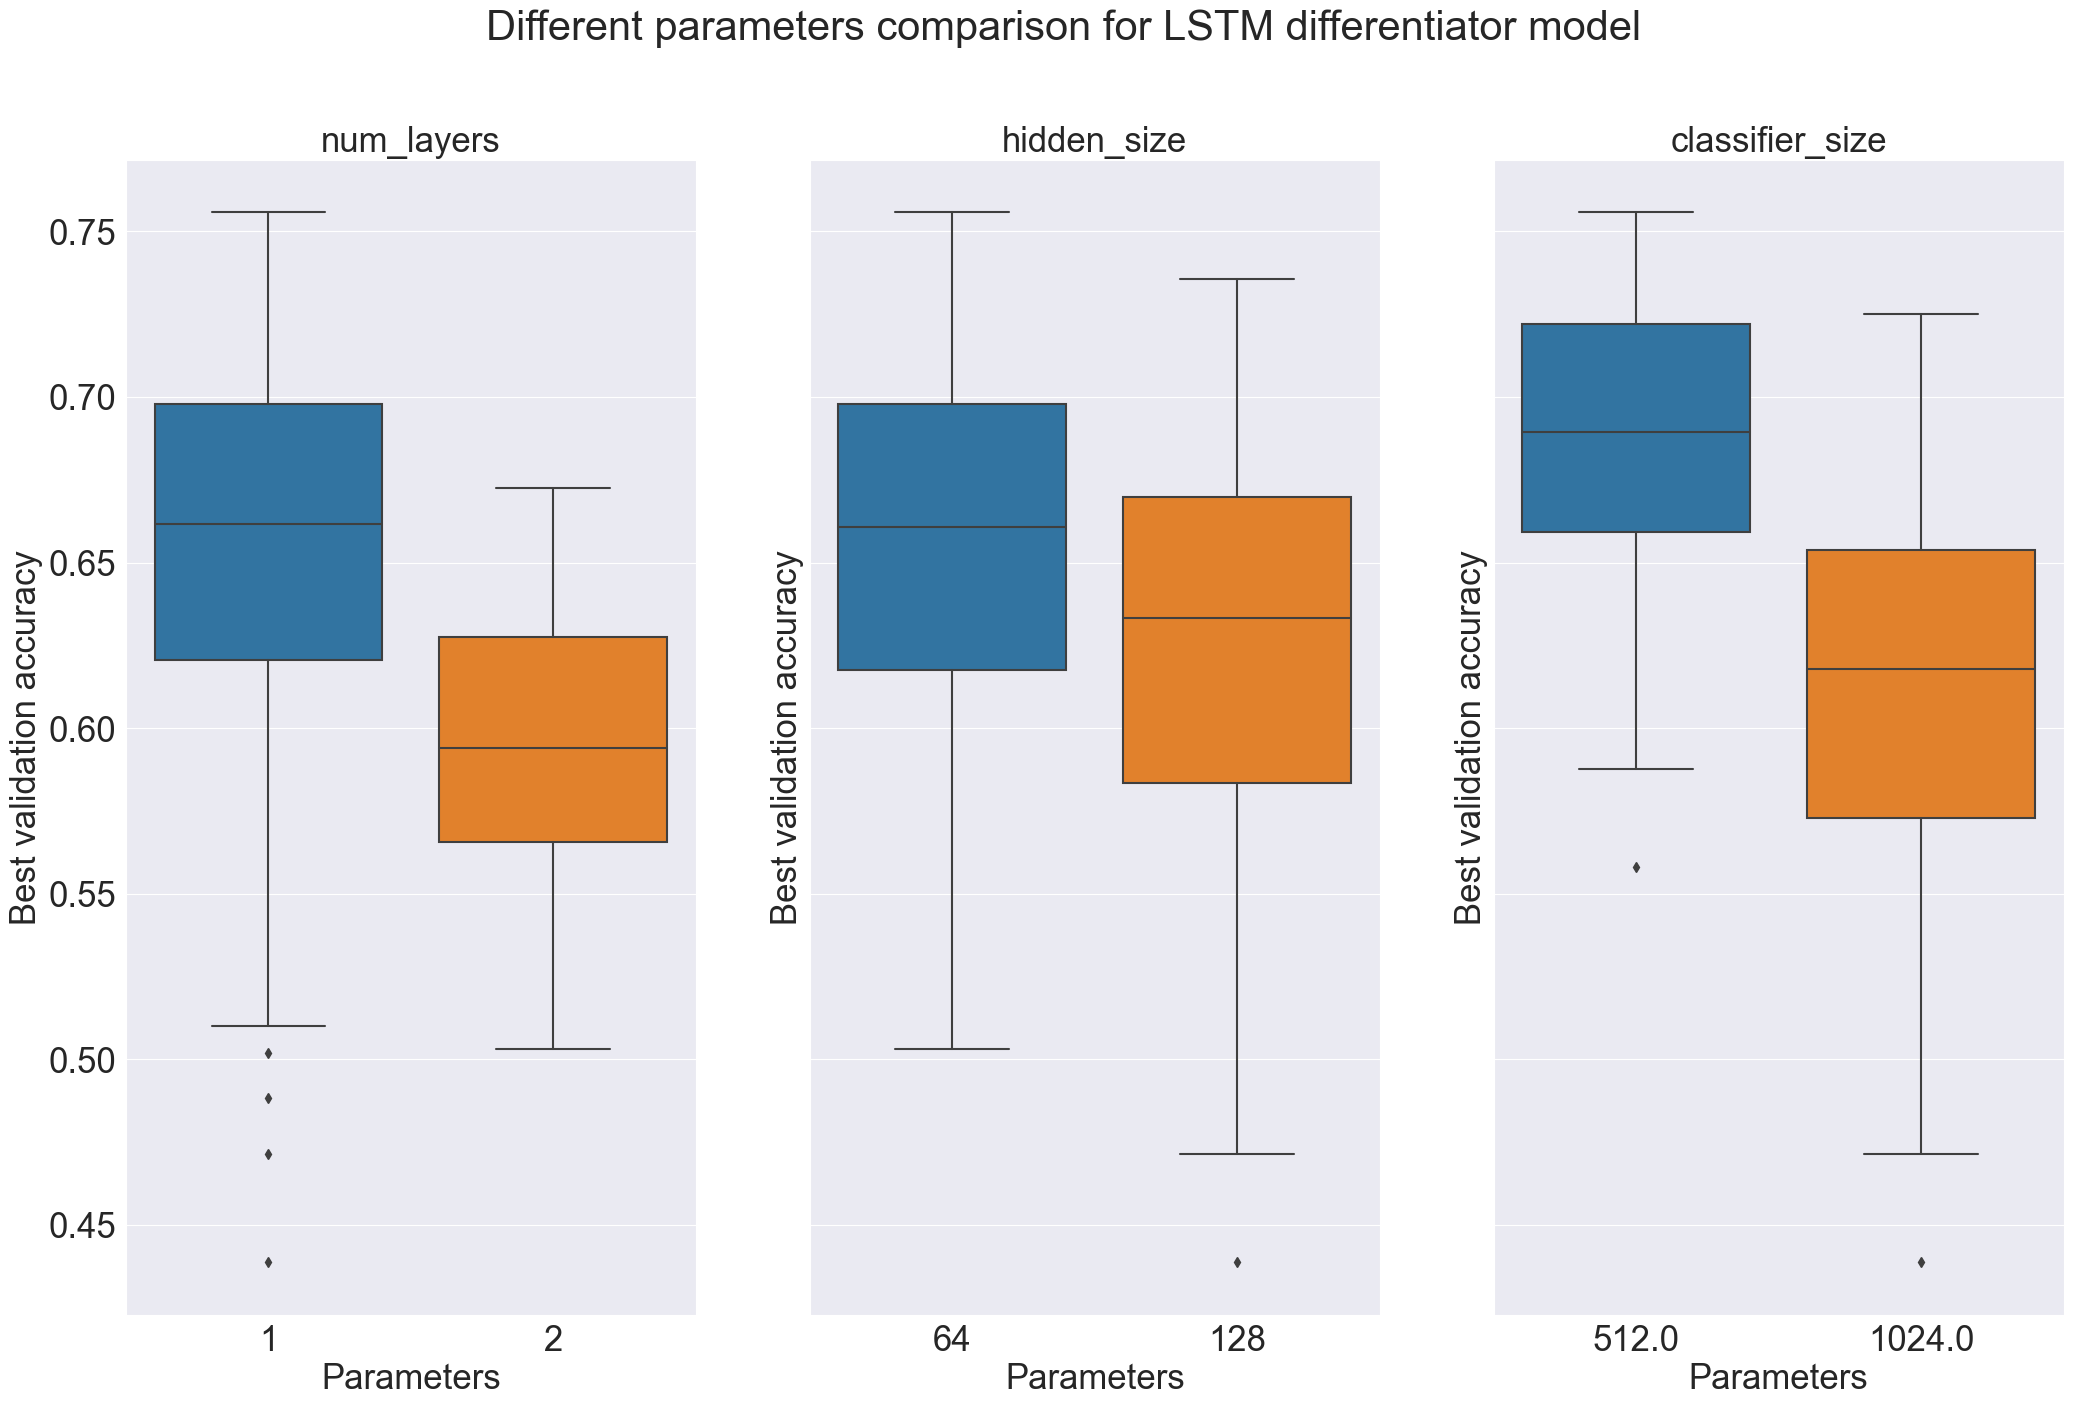

In [47]:
import seaborn as sns
from matplotlib import pyplot as plt
params = ['num_layers', 'hidden_size', 'classifier_size']
fig, ax = plt.subplots(1,3,figsize=(25,15), sharey='all')
fig.suptitle("Different parameters comparison for LSTM differentiator model", fontsize=30)
for i in range(3):
    sns.boxplot(x = "train_params." + params[i], y="best_accuracy_validation",
                data=res_df[(res_df['model'] == 'LSTM') & (res_df['group'] == 'differentiator')],
                ax=ax[i])
    ax[i].set_title(params[i], fontsize=25)
    ax[i].set_ylabel("Best validation accuracy", fontsize=25)
    ax[i].set_xlabel("Parameters", fontsize=25)
plt.show()

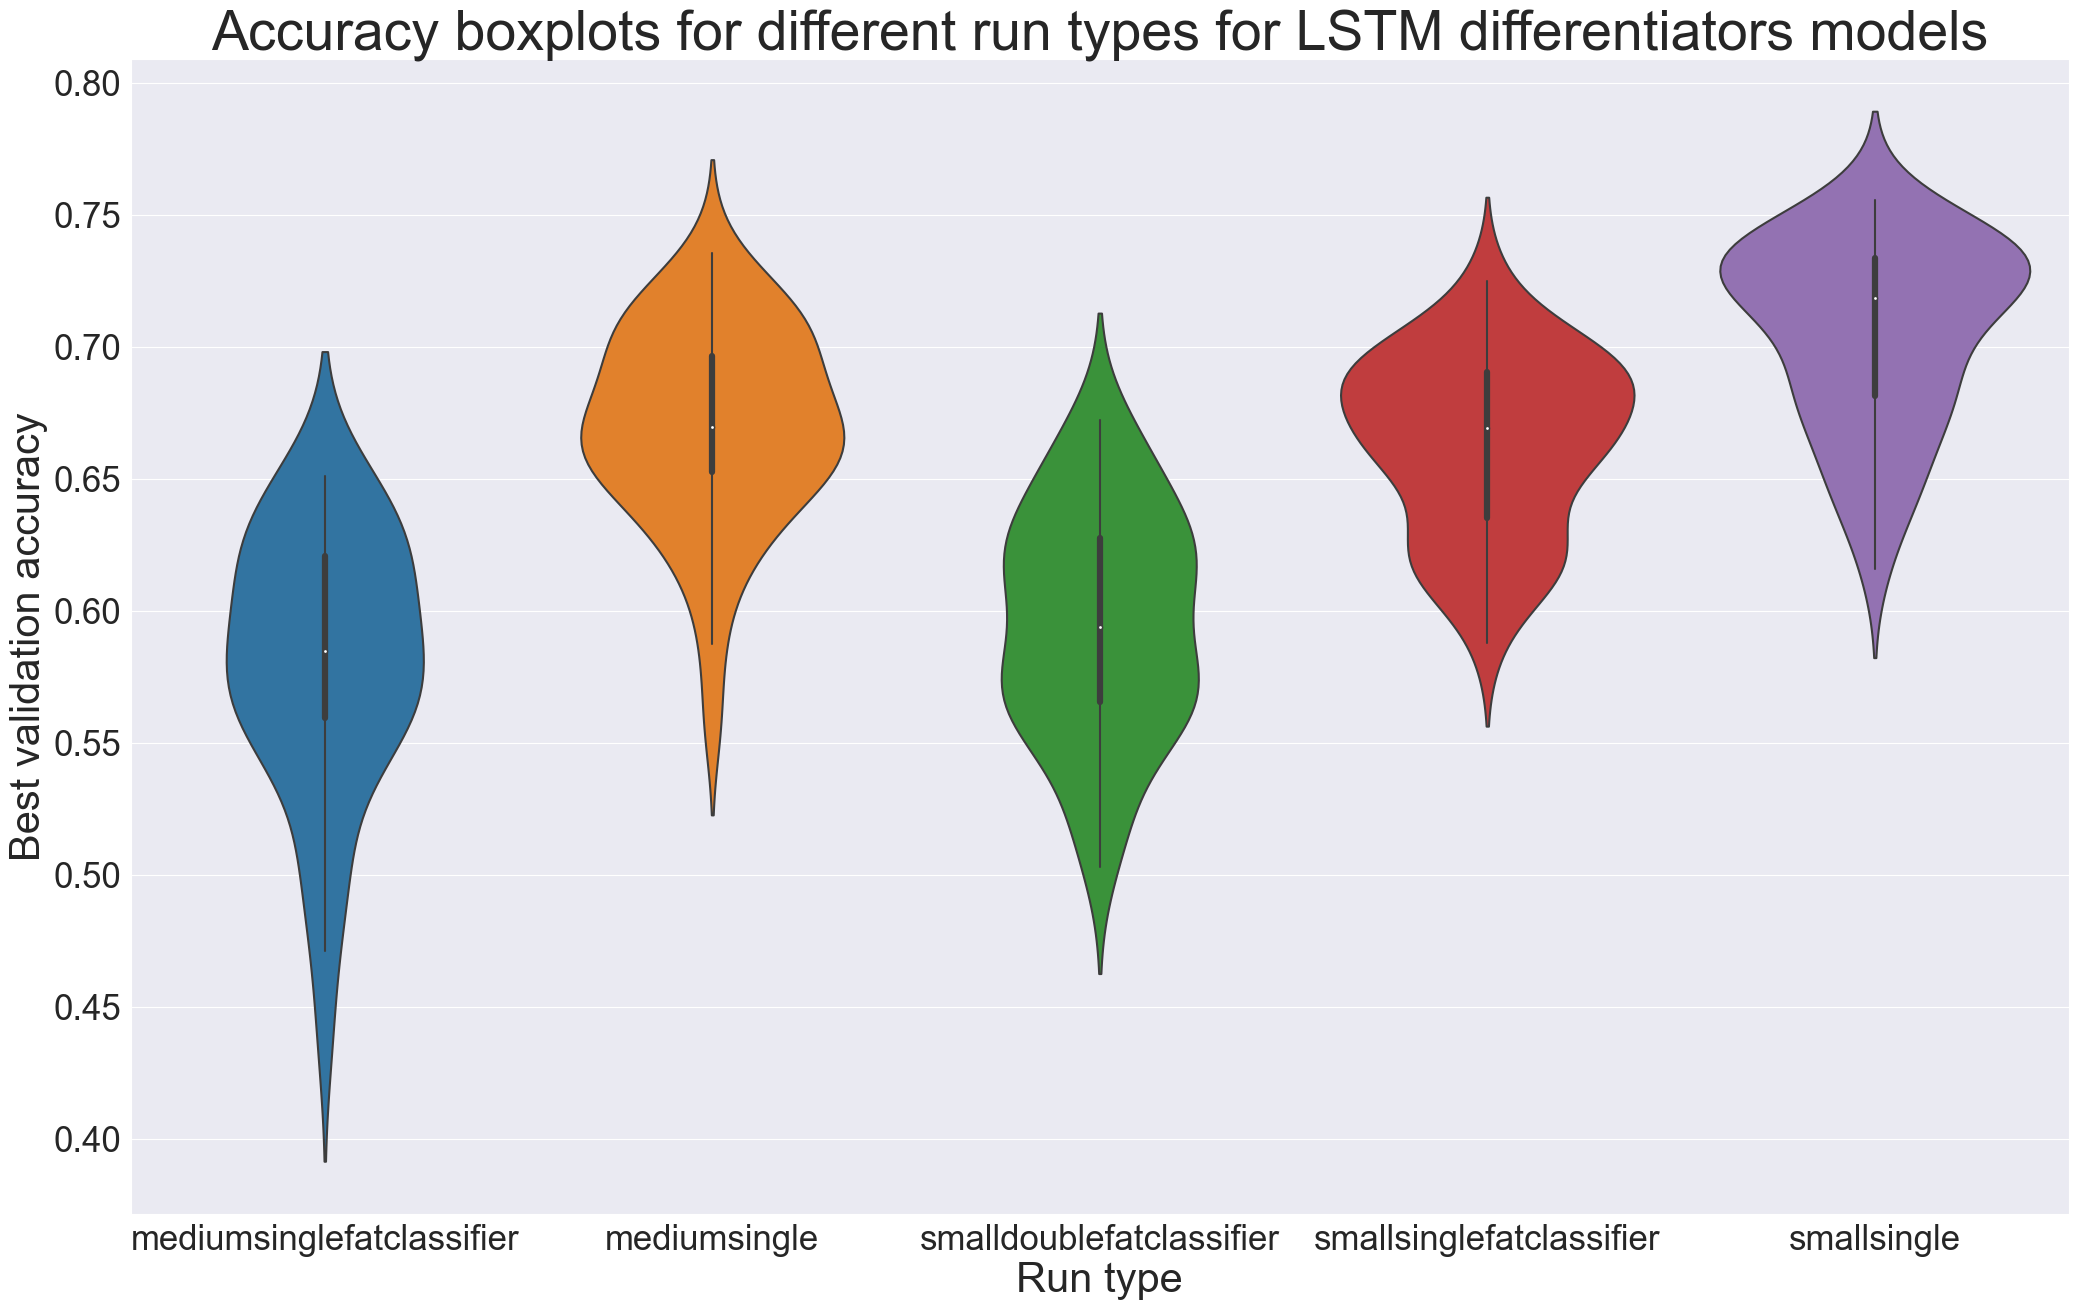

In [46]:
plt.show()
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(25, 15))
sns.violinplot(x="run_type", y="best_accuracy_validation",
               data=res_df[(res_df['model'] == 'LSTM') & (res_df['group'] == 'differentiator')])
plt.title("Accuracy boxplots for different run types for LSTM differentiators models", fontsize=40)
plt.ylabel("Best validation accuracy", fontsize=30)
plt.xlabel("Run type", fontsize=30)
plt.show()

In [31]:
res_df['group'].unique()

array(['equal', 'detector', 'differentiator', 'one'], dtype=object)

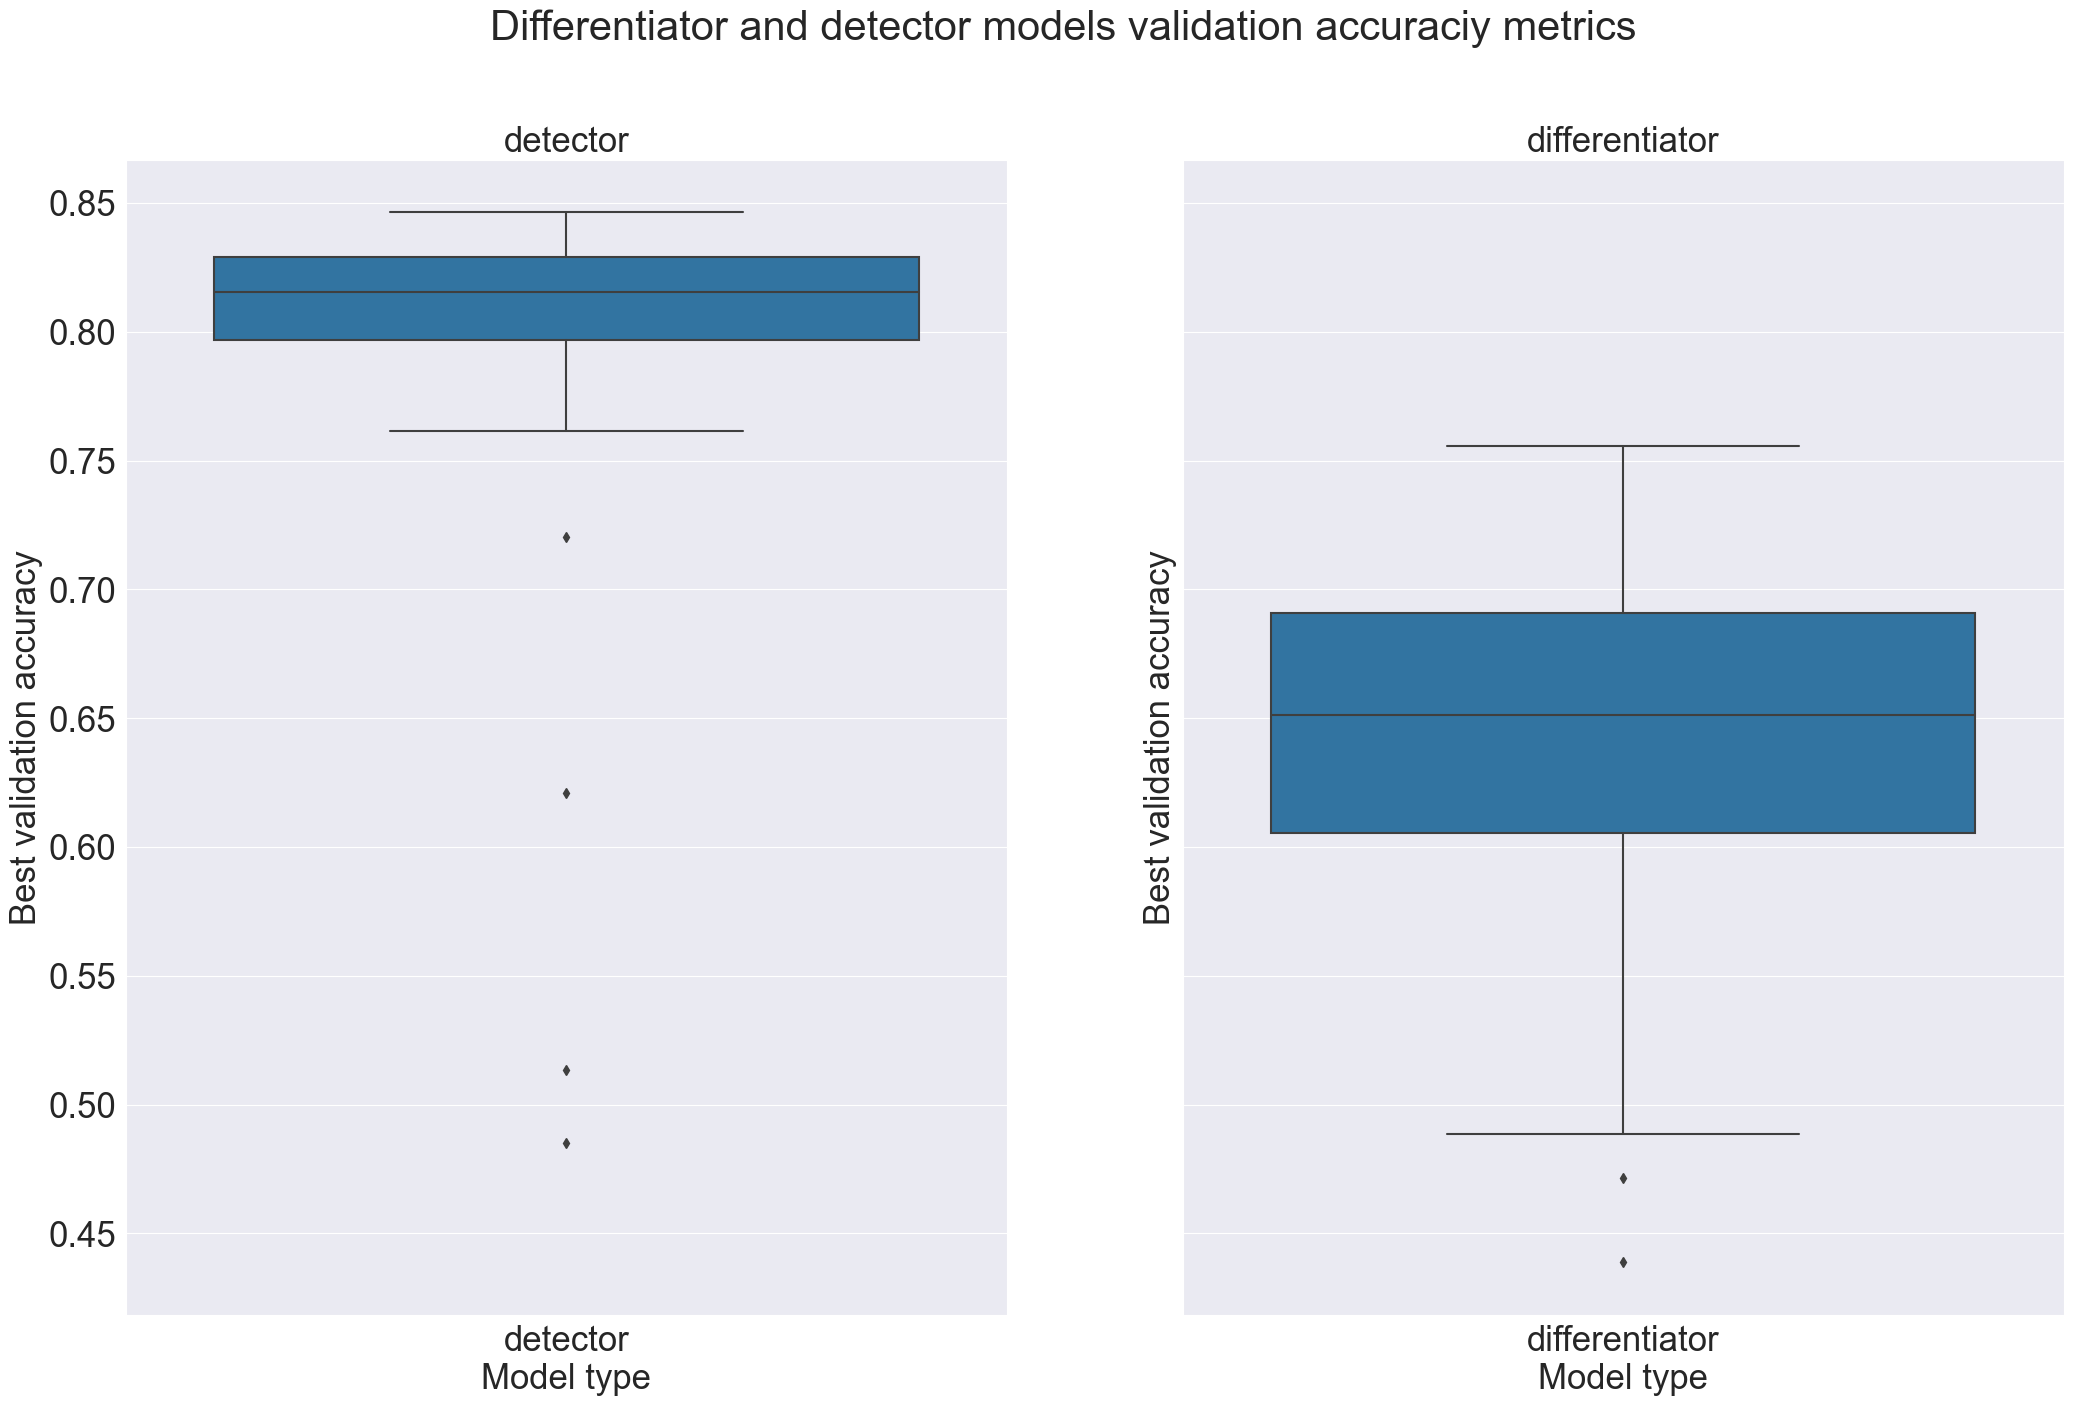

In [33]:
import seaborn as sns
from matplotlib import pyplot as plt
params = ['detector', 'differentiator']
fig, ax = plt.subplots(1,2,figsize=(25,15), sharey='all')
fig.suptitle("Differentiator and detector models validation accuraciy metrics", fontsize=30)
for i in range(2):
    sns.boxplot(x = "group", y="best_accuracy_validation",
                data=res_df[res_df['group'] == params[i]],
                ax=ax[i])
    ax[i].set_title(params[i], fontsize=25)
    ax[i].set_ylabel("Best validation accuracy", fontsize=25)
    ax[i].set_xlabel("Model type", fontsize=25)
plt.show()

In [41]:
top5_detectors = res_df[res_df['group'] == 'detector'].sort_values("best_accuracy_validation", ascending=False).head(5)
top5_diff = res_df[res_df['group'] == 'differentiator'].sort_values("best_accuracy_validation", ascending=False).head(5)
top5_models = res_df[(res_df['group'] != 'detector') &
                     (res_df['group'] != 'differentiator')]\
    .sort_values("best_accuracy_validation", ascending=False).head(5)

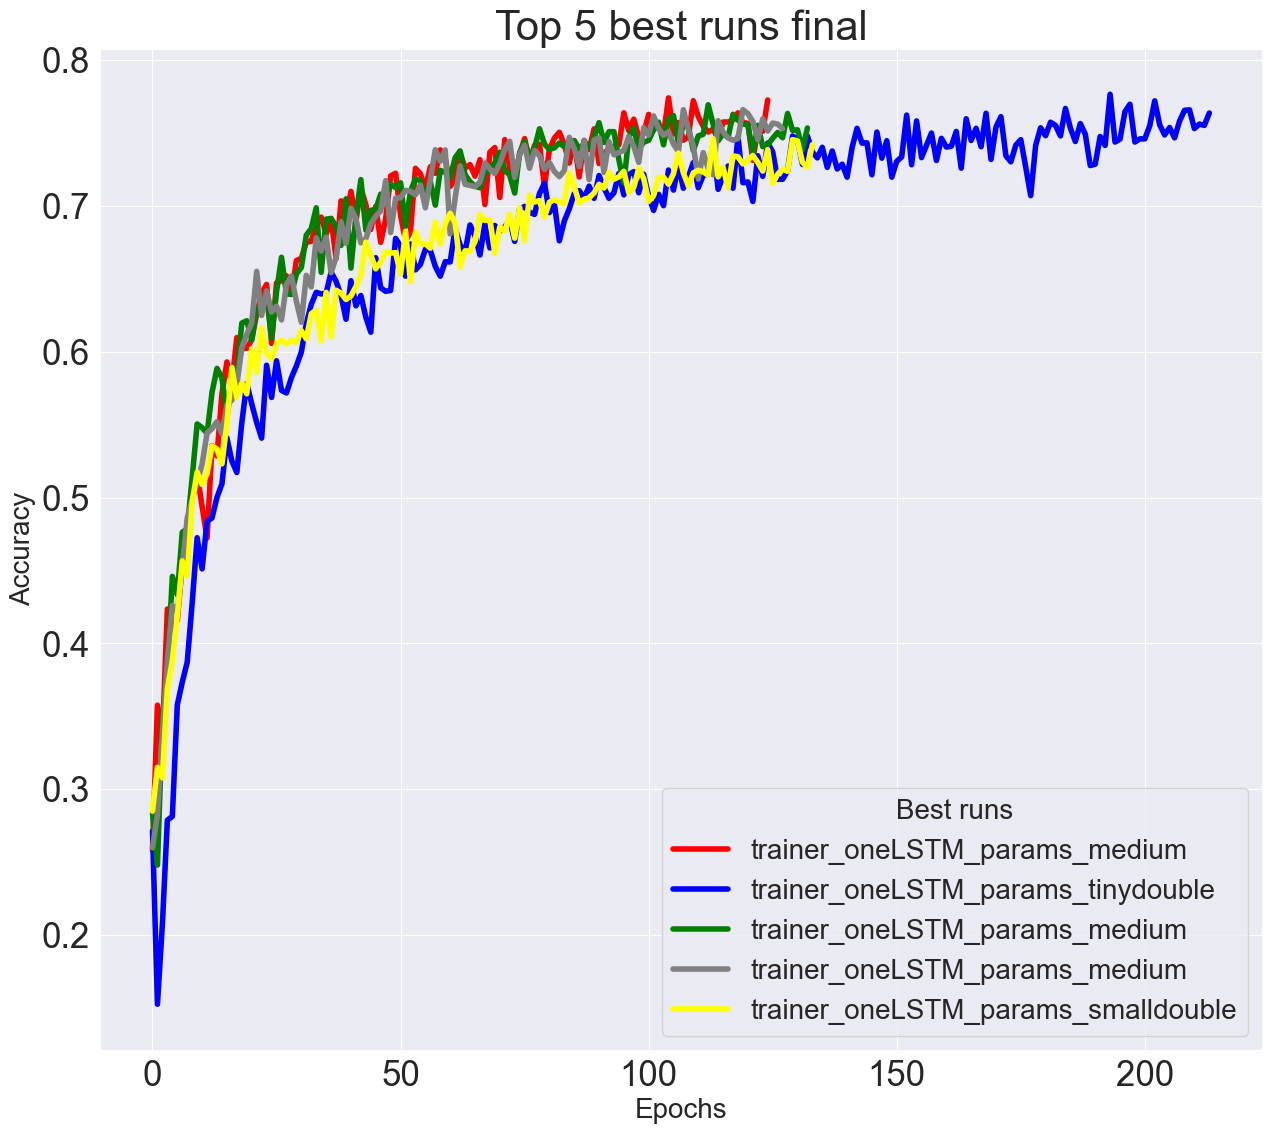

In [43]:
plot_best_trajectories(top5_models, "Top 5 best runs final", "Best runs")

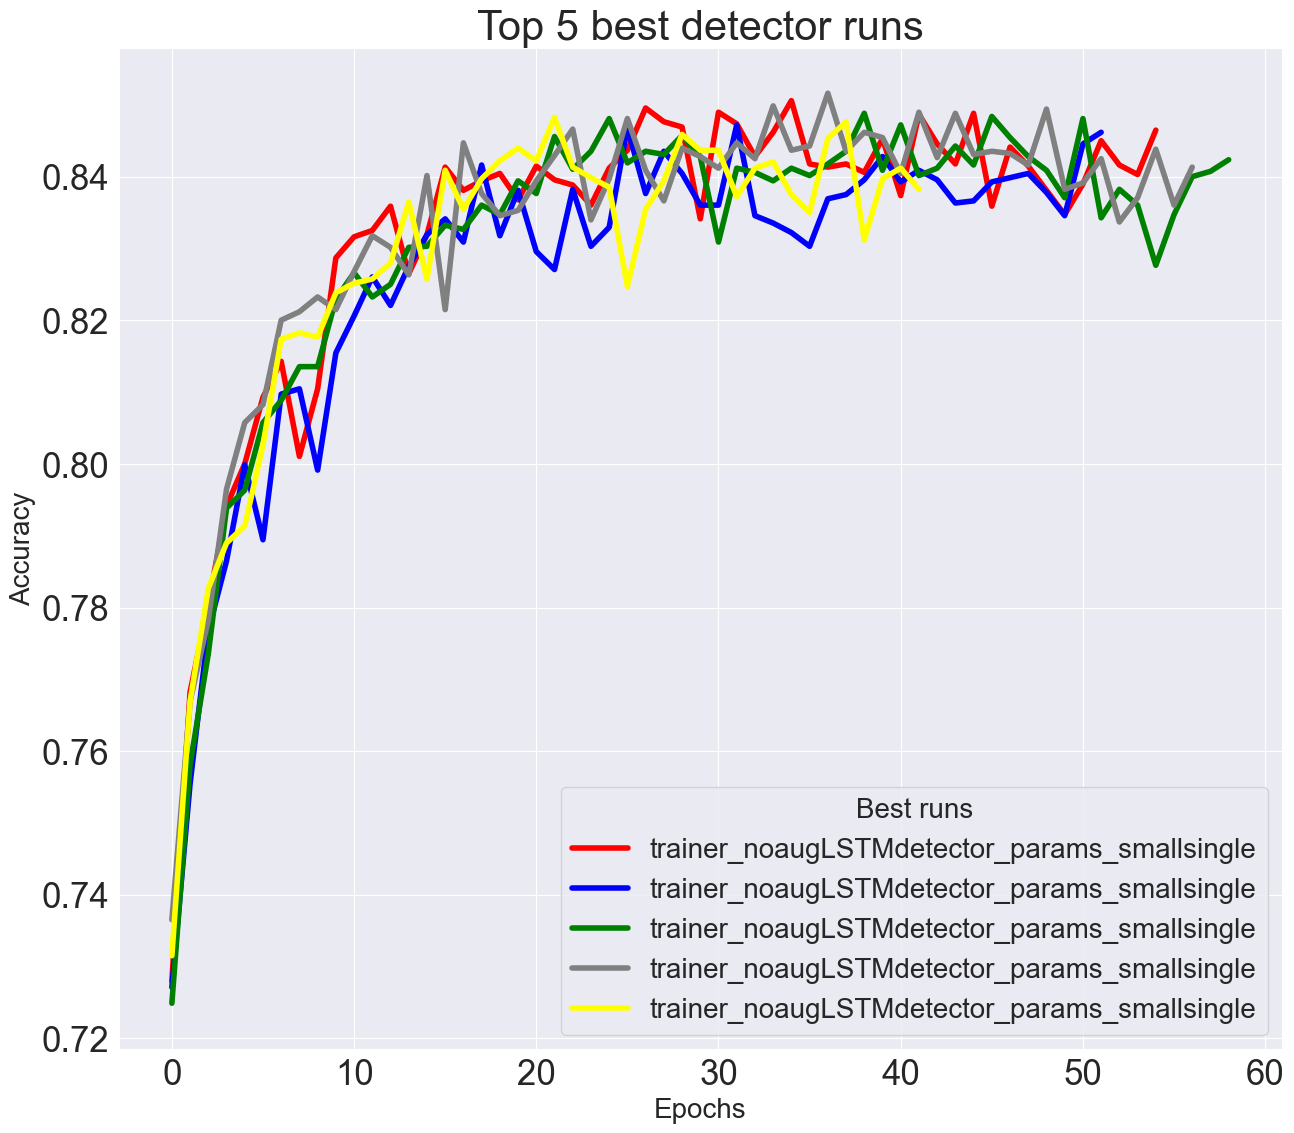

In [44]:
plot_best_trajectories(top5_detectors, "Top 5 best detector runs", "Best runs")

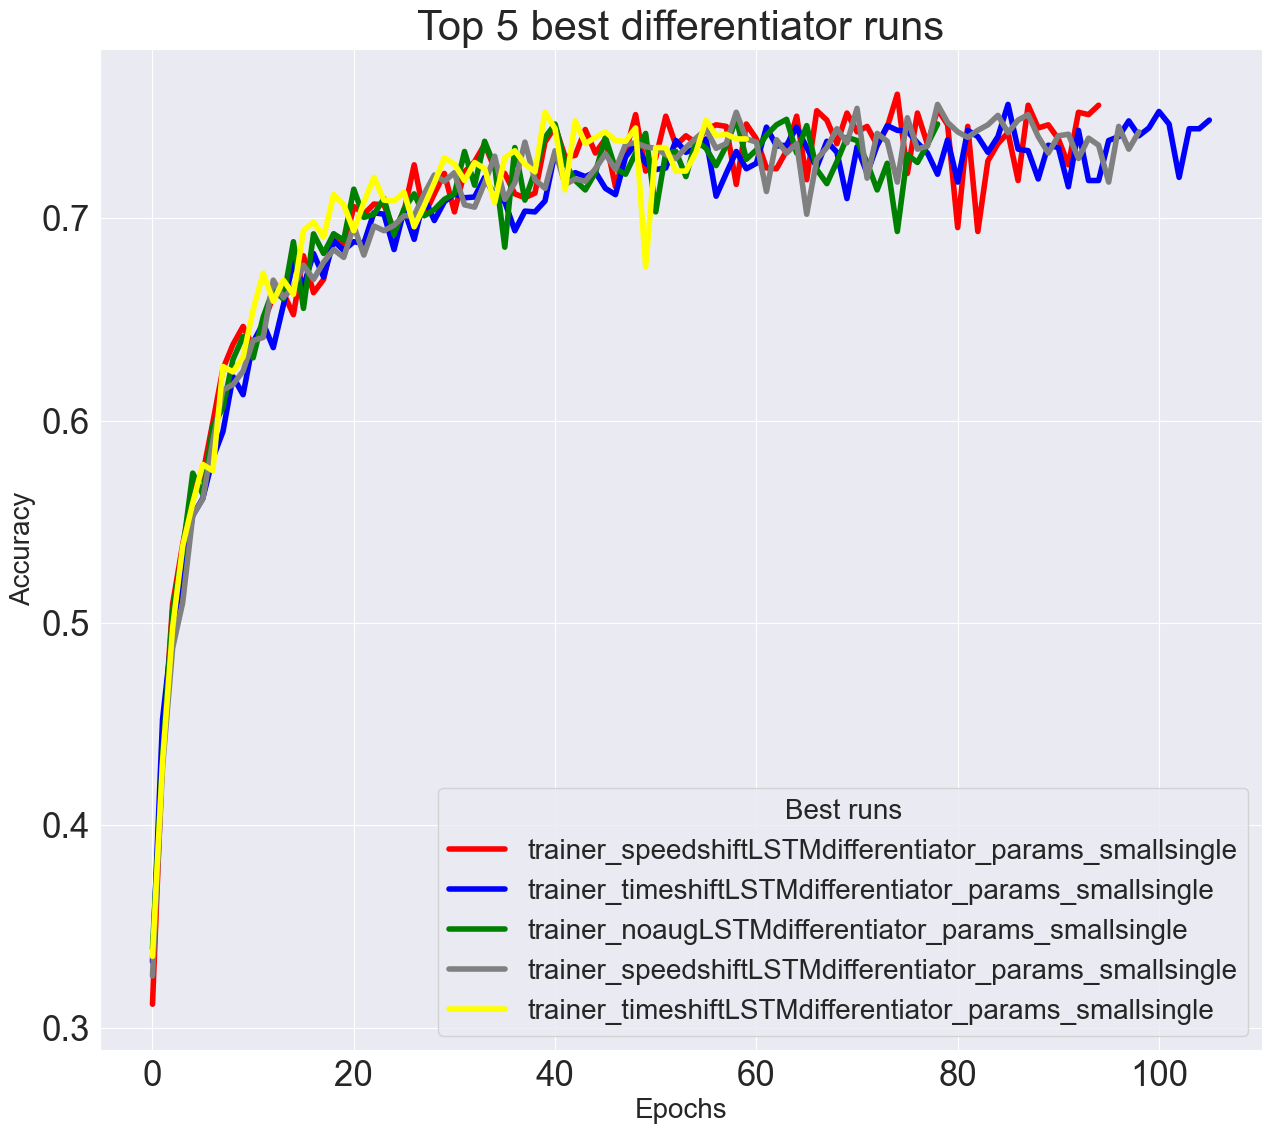

In [45]:
plot_best_trajectories(top5_diff, "Top 5 best differentiator runs", "Best runs")